In [1]:
mashr_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/mashr/"

In [2]:
sign_res = paste0(mashr_dir,"MASHR_scInc_local_false_sign_rate.txt")
mean_beta = paste0(mashr_dir,"MASHR_scInc_posterior_mean.txt")
std_beta = paste0(mashr_dir,"MASHR_scInc_posterior_standard_deviation.txt")
tissue_samplesize = paste0(mashr_dir,"tissueSampleSize_v7.txt")

In [3]:
library(reshape2)
library(ggplot2)
##Functions
reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd,method="complete")
  cormat <-cormat[hc$order, hc$order]
}

In [4]:
get_lower_tri <- function(cormat){
  cormat[upper.tri(cormat)]<- NA
  return(cormat)
}

In [5]:
#V6 sc included
lsfrMat = read.delim(sign_res,as.is=T, row.names=1)
posteriorMean = read.delim(mean_beta,as.is=T, row.names=1)

In [6]:
nrow(lsfrMat)

[1] 6205

In [7]:
head(lsfrMat)

,endoderm,iPSCsc,mesendo,pool1_13_noddd_D11_FPP,pool1_13_noddd_D11_NB,pool1_13_noddd_D11_P_FPP,pool1_13_noddd_D30_Astro,pool1_13_noddd_D30_DA,pool1_13_noddd_D30_Epen1,pool1_13_noddd_D30_Sert,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
1_10003457_G_C-ENSG00000178585,0.44756550,0.29400737,0.47078015,0.192236517,0.3043834,0.126094748,0.20065540,0.38523087,0.110636392,0.04202521,...,2.900490e-01,4.900241e-01,0.3209613,9.496639e-02,1.764493e-01,3.091435e-01,4.406890e-01,0.284170616,0.1847987,0.13314214
1_100373730_G_A-ENSG00000162688,0.32899142,0.47171999,0.39337491,0.004399539,0.3748359,0.093263418,0.43151461,0.01645753,0.207200710,0.07114212,...,2.816826e-02,1.576020e-03,0.1538014,6.989998e-02,3.085313e-01,1.925159e-01,5.423589e-02,0.062356593,0.0498211,0.01399746
1_10043142_G_A-ENSG00000162441,0.99916343,0.99947346,0.99913965,0.999307737,0.9994363,0.999320328,0.99911376,0.99935921,0.999507981,0.99911686,...,9.990670e-01,9.993958e-01,0.9991522,9.992160e-01,9.990814e-01,9.990901e-01,9.990799e-01,0.999179444,0.9995224,0.99944244
1_10046460_A_G-ENSG00000173614,0.48318818,0.48440332,0.47342882,0.408558503,0.4793062,0.433305629,0.48705463,0.38125684,0.372195960,0.39332505,...,1.244179e-01,1.478228e-01,0.2002305,1.767034e-01,1.463790e-01,1.306023e-01,1.279147e-01,0.203965824,0.1654696,0.26921744
1_100483822_A_G-ENSG00000117620,0.01201676,0.03205127,0.03454278,0.008635480,0.0459296,0.007471623,0.02092889,0.26997186,0.006278956,0.07097160,...,5.114971e-10,5.551115e-16,0.1286415,2.090795e-05,4.074975e-10,2.480948e-07,4.025081e-06,0.001775526,0.2832279,0.39881342
1_100578935_C_T-ENSG00000122435,0.31829216,0.21871928,0.18922265,0.468441075,0.4757508,0.102417344,0.34905015,0.17824355,0.402531072,0.39576445,...,6.940894e-03,1.888530e-04,0.3036308,3.075449e-01,2.580143e-01,9.892759e-02,3.103623e-02,0.076205502,0.1189119,0.46289337


In [8]:
head(rownames(lsfrMat))
genes = gsub(".*-","",rownames(lsfrMat))
head(genes)

[1] "1_10003457_G_C-ENSG00000178585"  "1_100373730_G_A-ENSG00000162688"
[3] "1_10043142_G_A-ENSG00000162441"  "1_10046460_A_G-ENSG00000173614" 
[5] "1_100483822_A_G-ENSG00000117620" "1_100578935_C_T-ENSG00000122435"

[1] "ENSG00000178585" "ENSG00000162688" "ENSG00000162441" "ENSG00000173614"
[5] "ENSG00000117620" "ENSG00000122435"

In [9]:
write.csv(genes, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/mashr/genes_expressed_in_all_tissues.csv")

In [10]:
colnames(lsfrMat)

[1] "endoderm"                             
 [2] "iPSCsc"                               
 [3] "mesendo"                              
 [4] "pool1_13_noddd_D11_FPP"               
 [5] "pool1_13_noddd_D11_NB"                
 [6] "pool1_13_noddd_D11_P_FPP"             
 [7] "pool1_13_noddd_D30_Astro"             
 [8] "pool1_13_noddd_D30_DA"                
 [9] "pool1_13_noddd_D30_Epen1"             
[10] "pool1_13_noddd_D30_Sert"              
[11] "pool1_17_D52_Astro_Rot.Treated"       
[12] "pool1_17_D52_Astro_Untreated"         
[13] "pool1_17_D52_Astro"                   
[14] "pool1_17_D52_DA_Rot.Treated"          
[15] "pool1_17_D52_DA_Untreated"            
[16] "pool1_17_D52_DA"                      
[17] "pool1_17_D52_Epen1_Rot.Treated"       
[18] "pool1_17_D52_Epen1_Untreated"         
[19] "pool1_17_D52_Epen1"                   
[20] "pool1_17_D52_Sert_Rot.Treated"        
[21] "pool1_17_D52_Sert_Untreated"          
[22] "pool1_17_D52_Sert"                    
[23] "Adipose_Subcutaneous"                 
[24] "Adipose_Visceral_Omentum"             
[25] "Adrenal_Gland"                        
[26] "Artery_Aorta"                         
[27] "Artery_Coronary"                      
[28] "Artery_Tibial"                        
[29] "Brain_Amygdala"                       
[30] "Brain_Anterior_cingulate_cortex_BA24" 
[31] "Brain_Caudate_basal_ganglia"          
[32] "Brain_Cerebellar_Hemisphere"          
[33] "Brain_Cerebellum"                     
[34] "Brain_Cortex"                         
[35] "Brain_Frontal_Cortex_BA9"             
[36] "Brain_Hippocampus"                    
[37] "Brain_Hypothalamus"                   
[38] "Brain_Nucleus_accumbens_basal_ganglia"
[39] "Brain_Putamen_basal_ganglia"          
[40] "Brain_Spinal_cord_cervical_c.1"       
[41] "Brain_Substantia_nigra"               
[42] "Breast_Mammary_Tissue"                
[43] "Cells_EBV.transformed_lymphocytes"    
[44] "Cells_Transformed_fibroblasts"        
[45] "Colon_Sigmoid"                        
[46] "Colon_Transverse"                     
[47] "Esophagus_Gastroesophageal_Junction"  
[48] "Esophagus_Mucosa"                     
[49] "Esophagus_Muscularis"                 
[50] "Heart_Atrial_Appendage"               
[51] "Heart_Left_Ventricle"                 
[52] "iPSC"                                 
[53] "Liver"                                
[54] "Lung"                                 
[55] "Minor_Salivary_Gland"                 
[56] "Muscle_Skeletal"                      
[57] "Nerve_Tibial"                         
[58] "Ovary"                                
[59] "Pancreas"                             
[60] "Pituitary"                            
[61] "Prostate"                             
[62] "Skin_Not_Sun_Exposed_Suprapubic"      
[63] "Skin_Sun_Exposed_Lower_leg"           
[64] "Small_Intestine_Terminal_Ileum"       
[65] "Spleen"                               
[66] "Stomach"                              
[67] "Testis"                               
[68] "Thyroid"                              
[69] "Uterus"                               
[70] "Vagina"                               
[71] "Whole_Blood"

In [11]:
# sampleSizeTissues = read.delim(tissue_samplesize,as.is=T, sep=",")
# sampleSizeTissues
# sampleSizeTissues = sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]
# head(sampleSizeTissues)
# all(sampleSizeTissues$tissue == colnames(lsfrMat))
# sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]

In [12]:
ratio = 2
lsfrThreshold = 0.1
any = T
both = F
smallest = F

In [13]:
sameSignMagnitude = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))
sameSign = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))
total = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))

In [14]:
cols = grep("_D",colnames(lsfrMat))
length(colnames(lsfrMat)[cols])

[1] 19

In [15]:
nrow(lsfrMat)

[1] 6205

In [17]:
options(warn=2)
if(sum(any,both, smallest)==1){
  for(colN in 1:ncol(lsfrMat)){
    for(colM in colN:ncol(lsfrMat)){
      if(any){
        toConsider = unique(c(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold)))
      } else if(both) {
        toConsider = intersect(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold))
      } else if(smallest){
        if(sampleSizeTissues$n[colN] > sampleSizeTissues$n[colM]){
          toConsider = which(lsfrMat[,colM]<lsfrThreshold)
        } else {
          toConsider = which(lsfrMat[,colN]<lsfrThreshold)
        }
      }
      total[colN,colM] = length(toConsider)
      total[colM,colN] = total[colN,colM]
      
      tmpInfo = posteriorMean[toConsider,colN]/posteriorMean[toConsider,colM]
      tmpInfo2 = tmpInfo[which(tmpInfo>0)]
      sameSign[colN,colM] = length(tmpInfo2)
      sameSign[colM,colN] = sameSign[colN,colM]
      
      tmpInfo2[which(tmpInfo2<1)] = 1/tmpInfo2[which(tmpInfo2<1)]
      sameSignMagnitude[colN,colM] = length(which(tmpInfo2<=ratio))
      sameSignMagnitude[colM,colN] = sameSignMagnitude[colN,colM]
    }
  }
} else {
  print("Setting issue.")
}

In [18]:
# options(warn=1)

pairwiseSharingSign = sameSign/total
pairwiseSharing = sameSignMagnitude/total

colnames(pairwiseSharing) = colnames(lsfrMat)
rownames(pairwiseSharing) = colnames(lsfrMat)
colnames(pairwiseSharingSign) = colnames(lsfrMat)
rownames(pairwiseSharingSign) = colnames(lsfrMat)

##Sign only
upper_tri <- get_lower_tri(reorder_cormat(as.matrix(pairwiseSharingSign)))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
head(melted_cormat)

Var1,Var2,value
iPSC,iPSC,1.0000000
pool1_13_noddd_D30_DA,iPSC,0.6860047
pool1_13_noddd_D30_Epen1,iPSC,0.6957633
pool1_13_noddd_D30_Astro,iPSC,0.6991398
pool1_13_noddd_D30_Sert,iPSC,0.6950053
pool1_17_D52_Epen1_Untreated,iPSC,0.7200942


In [19]:
# install.packages("ggthemes")

In [20]:
library(ggthemes)

In [21]:
col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [22]:
colnames(pairwiseSharingSign)

[1] "endoderm"                             
 [2] "iPSCsc"                               
 [3] "mesendo"                              
 [4] "pool1_13_noddd_D11_FPP"               
 [5] "pool1_13_noddd_D11_NB"                
 [6] "pool1_13_noddd_D11_P_FPP"             
 [7] "pool1_13_noddd_D30_Astro"             
 [8] "pool1_13_noddd_D30_DA"                
 [9] "pool1_13_noddd_D30_Epen1"             
[10] "pool1_13_noddd_D30_Sert"              
[11] "pool1_17_D52_Astro_Rot.Treated"       
[12] "pool1_17_D52_Astro_Untreated"         
[13] "pool1_17_D52_Astro"                   
[14] "pool1_17_D52_DA_Rot.Treated"          
[15] "pool1_17_D52_DA_Untreated"            
[16] "pool1_17_D52_DA"                      
[17] "pool1_17_D52_Epen1_Rot.Treated"       
[18] "pool1_17_D52_Epen1_Untreated"         
[19] "pool1_17_D52_Epen1"                   
[20] "pool1_17_D52_Sert_Rot.Treated"        
[21] "pool1_17_D52_Sert_Untreated"          
[22] "pool1_17_D52_Sert"                    
[23] "Adipose_Subcutaneous"                 
[24] "Adipose_Visceral_Omentum"             
[25] "Adrenal_Gland"                        
[26] "Artery_Aorta"                         
[27] "Artery_Coronary"                      
[28] "Artery_Tibial"                        
[29] "Brain_Amygdala"                       
[30] "Brain_Anterior_cingulate_cortex_BA24" 
[31] "Brain_Caudate_basal_ganglia"          
[32] "Brain_Cerebellar_Hemisphere"          
[33] "Brain_Cerebellum"                     
[34] "Brain_Cortex"                         
[35] "Brain_Frontal_Cortex_BA9"             
[36] "Brain_Hippocampus"                    
[37] "Brain_Hypothalamus"                   
[38] "Brain_Nucleus_accumbens_basal_ganglia"
[39] "Brain_Putamen_basal_ganglia"          
[40] "Brain_Spinal_cord_cervical_c.1"       
[41] "Brain_Substantia_nigra"               
[42] "Breast_Mammary_Tissue"                
[43] "Cells_EBV.transformed_lymphocytes"    
[44] "Cells_Transformed_fibroblasts"        
[45] "Colon_Sigmoid"                        
[46] "Colon_Transverse"                     
[47] "Esophagus_Gastroesophageal_Junction"  
[48] "Esophagus_Mucosa"                     
[49] "Esophagus_Muscularis"                 
[50] "Heart_Atrial_Appendage"               
[51] "Heart_Left_Ventricle"                 
[52] "iPSC"                                 
[53] "Liver"                                
[54] "Lung"                                 
[55] "Minor_Salivary_Gland"                 
[56] "Muscle_Skeletal"                      
[57] "Nerve_Tibial"                         
[58] "Ovary"                                
[59] "Pancreas"                             
[60] "Pituitary"                            
[61] "Prostate"                             
[62] "Skin_Not_Sun_Exposed_Suprapubic"      
[63] "Skin_Sun_Exposed_Lower_leg"           
[64] "Small_Intestine_Terminal_Ileum"       
[65] "Spleen"                               
[66] "Stomach"                              
[67] "Testis"                               
[68] "Thyroid"                              
[69] "Uterus"                               
[70] "Vagina"                               
[71] "Whole_Blood"

In [23]:
mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4,6,5,7,8,10,9,16,22,19,13)] #all
# mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4,6,5,8,10,9,7,17,21,18,12)] # untreated
# mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4,6,5,8,10,9,7,16,20,17,11)] # ROT treated
head(mat_to_plot)

,iPSC,iPSCsc,pool1_13_noddd_D11_FPP,pool1_13_noddd_D11_P_FPP,pool1_13_noddd_D11_NB,pool1_13_noddd_D30_Astro,pool1_13_noddd_D30_DA,pool1_13_noddd_D30_Sert,pool1_13_noddd_D30_Epen1,pool1_17_D52_DA,pool1_17_D52_Sert,pool1_17_D52_Epen1,pool1_17_D52_Astro
Brain_Amygdala,0.7317606,0.7984471,0.8062752,0.8016973,0.8055740,0.8177570,0.8036719,0.8293578,0.8177940,0.8572698,0.8266782,0.8272593,0.8140930
Brain_Anterior_cingulate_cortex_BA24,0.7199044,0.7687934,0.7889702,0.7963788,0.8162268,0.7978175,0.7900408,0.8219708,0.8057382,0.8517023,0.8228458,0.8217505,0.8104363
Brain_Caudate_basal_ganglia,0.7298863,0.7581409,0.7592098,0.7772751,0.8104192,0.7859397,0.7911445,0.7950014,0.7824986,0.8408400,0.8021592,0.8173024,0.7797222
Brain_Cerebellar_Hemisphere,0.7299112,0.7771270,0.7747871,0.7896317,0.7992436,0.7941615,0.7530342,0.7968840,0.7757172,0.8443746,0.8186412,0.8055476,0.7981018
Brain_Cerebellum,0.7098214,0.7560206,0.7563158,0.7588358,0.7919859,0.7950958,0.7363395,0.7697333,0.7801047,0.8247840,0.8002120,0.7977254,0.7738612
Brain_Cortex,0.7201549,0.7706732,0.7970775,0.7772049,0.8182686,0.8013597,0.7837532,0.8096616,0.7997678,0.8423436,0.8137988,0.8248217,0.8062105


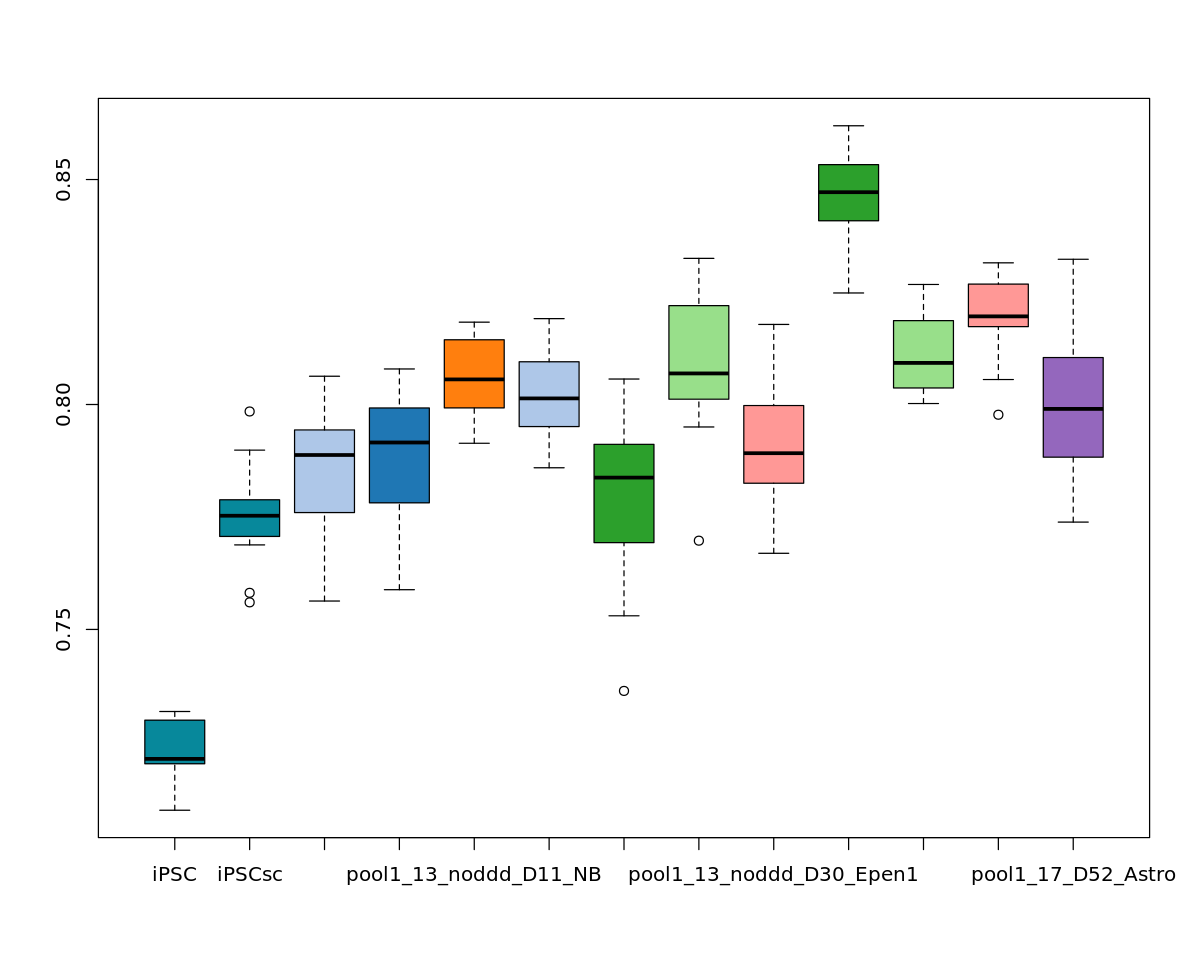

In [24]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(mat_to_plot, col = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,col_NB,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro))

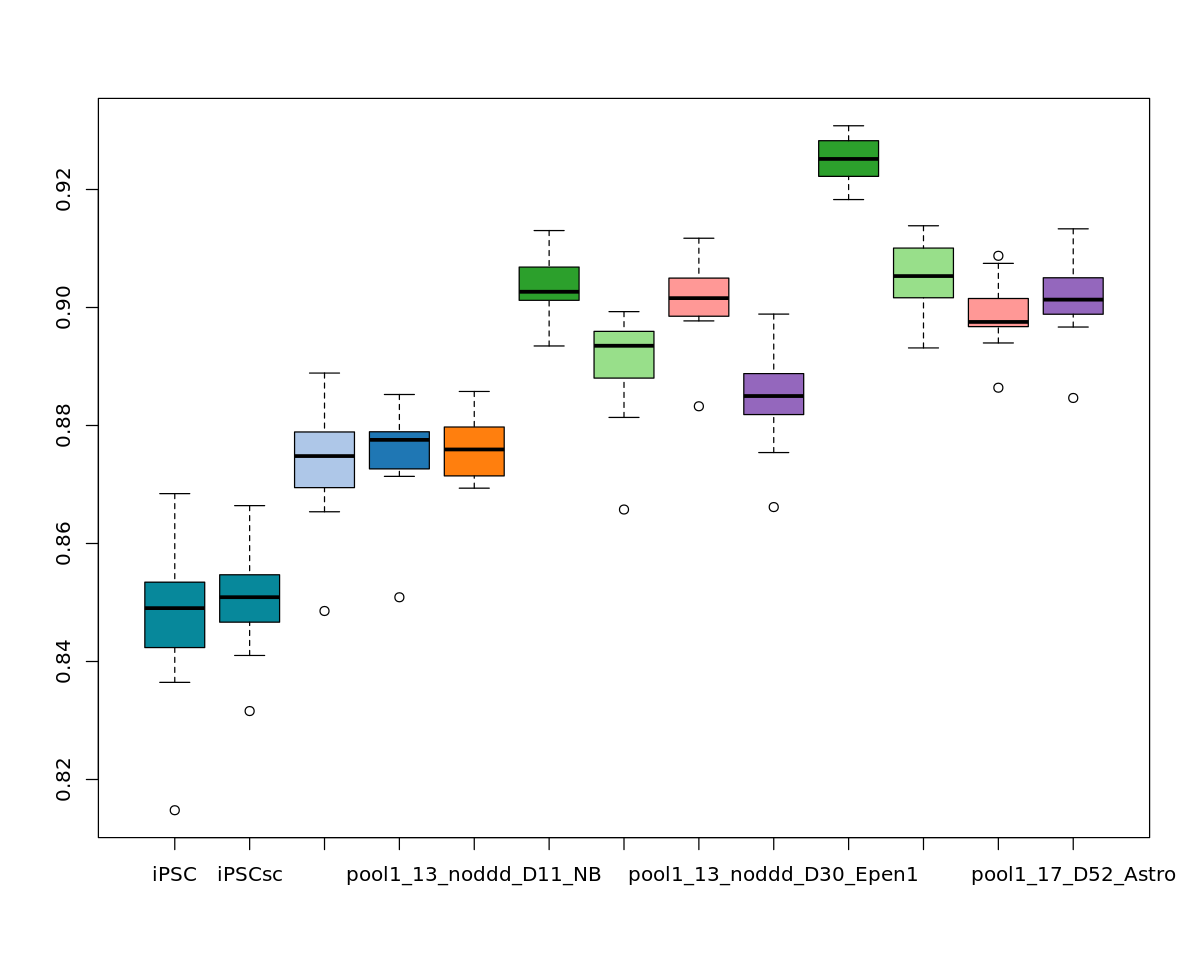

In [26]:
boxplot(mat_to_plot, col = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,col_NB,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))

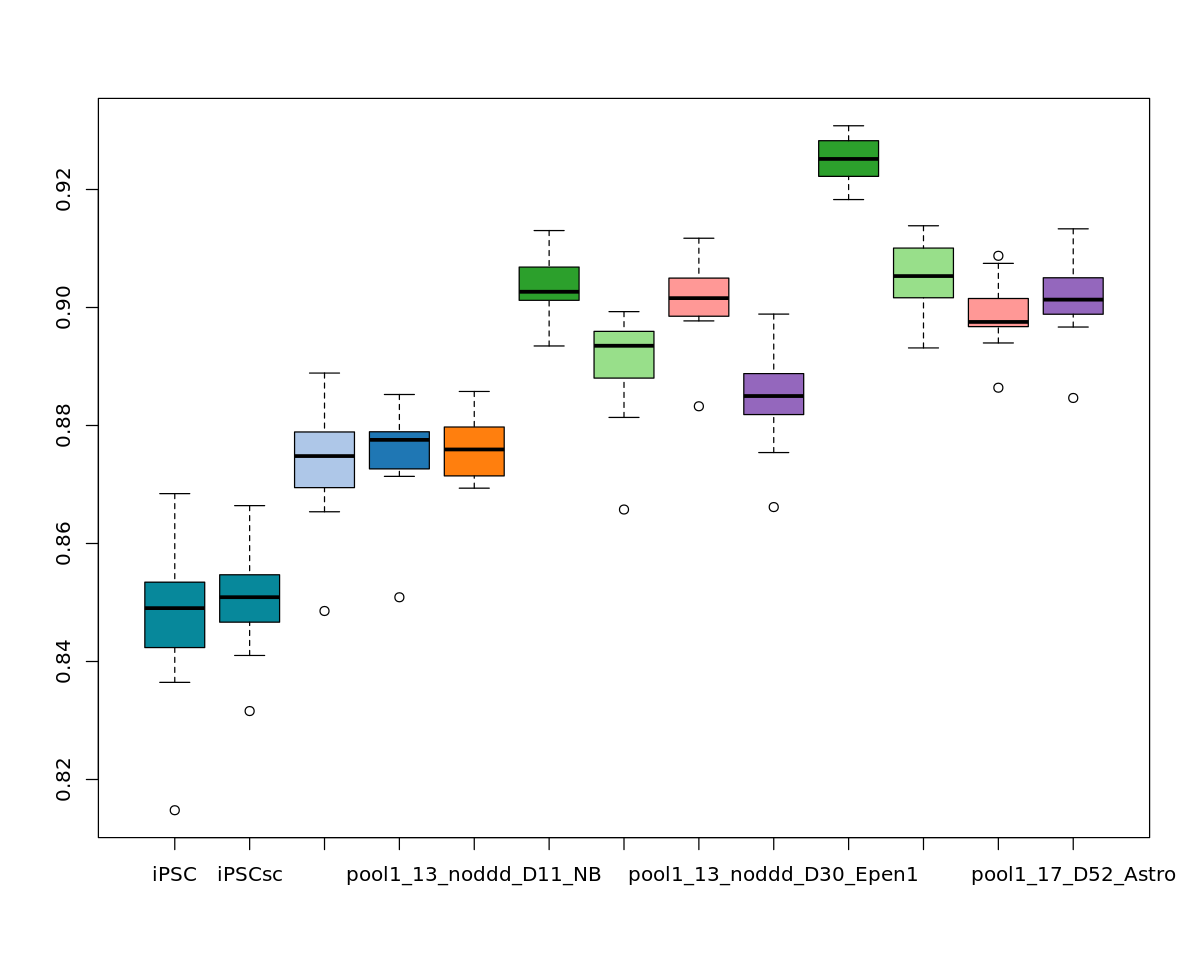

In [27]:
boxplot(mat_to_plot, col = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,col_NB,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))

In [28]:
mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4:22)]
head(mat_to_plot)

,iPSC,iPSCsc,pool1_13_noddd_D11_FPP,pool1_13_noddd_D11_NB,pool1_13_noddd_D11_P_FPP,pool1_13_noddd_D30_Astro,pool1_13_noddd_D30_DA,pool1_13_noddd_D30_Epen1,pool1_13_noddd_D30_Sert,pool1_17_D52_Astro_Rot.Treated,...,pool1_17_D52_Astro,pool1_17_D52_DA_Rot.Treated,pool1_17_D52_DA_Untreated,pool1_17_D52_DA,pool1_17_D52_Epen1_Rot.Treated,pool1_17_D52_Epen1_Untreated,pool1_17_D52_Epen1,pool1_17_D52_Sert_Rot.Treated,pool1_17_D52_Sert_Untreated,pool1_17_D52_Sert
Brain_Amygdala,0.8684547,0.8664193,0.8888889,0.8797468,0.8852584,0.9130435,0.8959587,0.8988860,0.9117402,0.9090074,...,0.9133333,0.9180180,0.9159034,0.9278882,0.8923213,0.9140562,0.9074788,0.8988860,0.9129412,0.9138577
Brain_Anterior_cingulate_cortex_BA24,0.8563015,0.8442478,0.8809869,0.8811881,0.8806497,0.9063518,0.8986212,0.8962109,0.9101034,0.9129678,...,0.9076087,0.9235936,0.9116719,0.9282730,0.8991870,0.9136364,0.9087644,0.9033306,0.9132691,0.9135365
Brain_Caudate_basal_ganglia,0.8382199,0.8466667,0.8692676,0.8759398,0.8715047,0.8937984,0.8977444,0.8818533,0.8977273,0.9102041,...,0.8991163,0.9153355,0.9067245,0.9243105,0.8913043,0.9000000,0.8975218,0.8876147,0.9025605,0.9023256
Brain_Cerebellar_Hemisphere,0.8364641,0.8521368,0.8653846,0.8788177,0.8762958,0.9024584,0.8813694,0.8810106,0.9015873,0.9045139,...,0.8993238,0.9194079,0.9146707,0.9281477,0.8917402,0.9014706,0.8988137,0.8924051,0.9054252,0.9100744
Brain_Cerebellum,0.8147967,0.8316042,0.8485640,0.8736162,0.8508883,0.8934783,0.8657617,0.8661765,0.8832599,0.8891566,...,0.8846695,0.9072797,0.8992908,0.9182927,0.8845300,0.8880647,0.8864071,0.8809172,0.8859470,0.8931490
Brain_Cortex,0.8423619,0.8508914,0.8743169,0.8815427,0.8713805,0.8983708,0.8880368,0.8840467,0.9009752,0.9048414,...,0.9013353,0.9160671,0.9118718,0.9245161,0.8868217,0.9030869,0.8967611,0.8926641,0.9019190,0.9053254


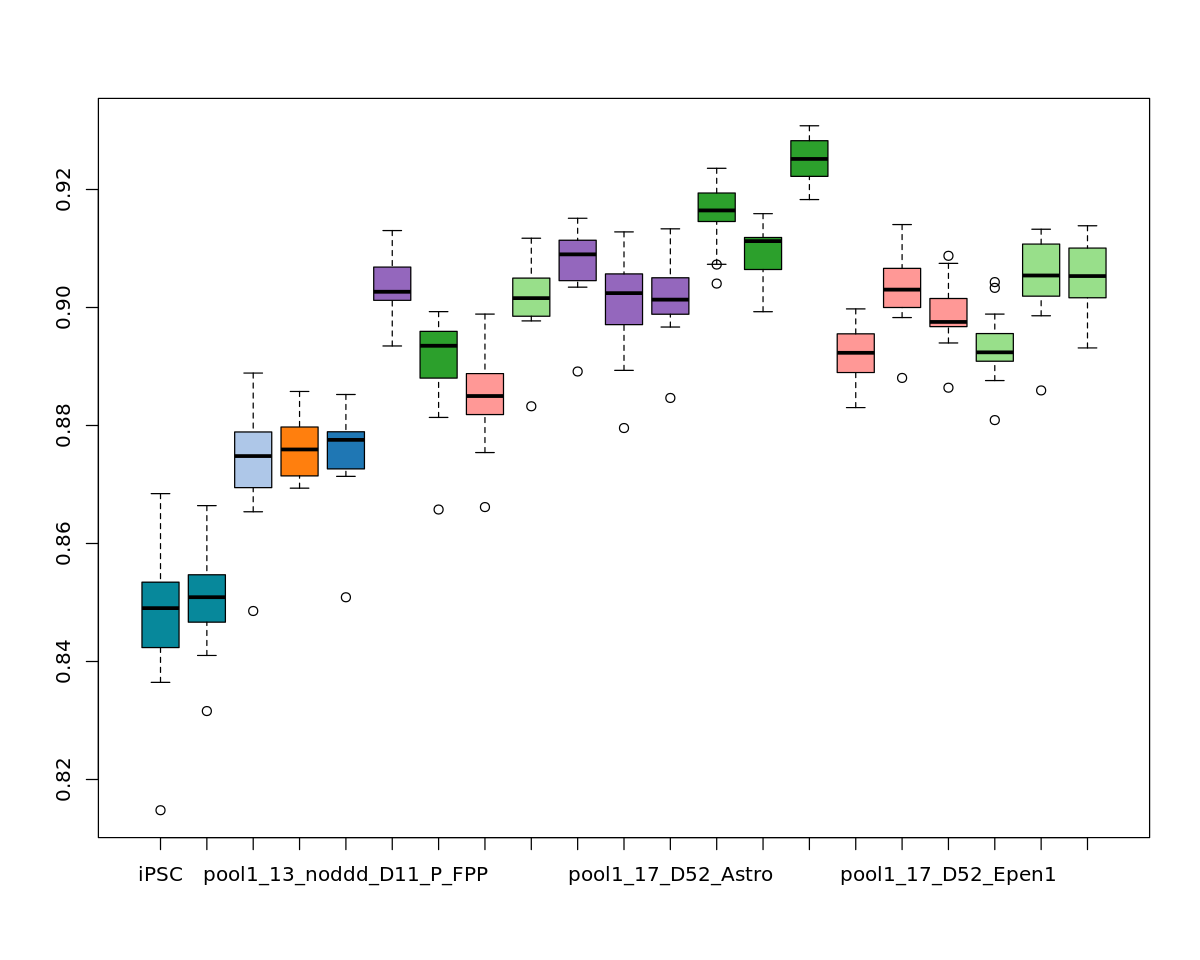

In [29]:
boxplot(mat_to_plot, col = c(col_ips,col_ips,
                            col_FPP,col_NB,col_P_FPP,
                            col_Astro,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_Astro,
                            col_DA,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Epen1,
                            col_Sert,col_Sert,col_Sert))

In [77]:
mat_to_plot = pairwiseSharingSign[c(29:41),c(52,4,6:12,14:15,17:18,20:21)]
mat_to_plot = pairwiseSharingSign[c(29:41),c(2,4,6:12,14:15,17:18,20:21)]
colnames(mat_to_plot)

[1] "iPSCsc"                         "pool1_13_noddd_D11_FPP"        
 [3] "pool1_13_noddd_D11_P_FPP"       "pool1_13_noddd_D30_Astro"      
 [5] "pool1_13_noddd_D30_DA"          "pool1_13_noddd_D30_Epen1"      
 [7] "pool1_13_noddd_D30_Sert"        "pool1_17_D52_Astro_Rot.Treated"
 [9] "pool1_17_D52_Astro_Untreated"   "pool1_17_D52_DA_Rot.Treated"   
[11] "pool1_17_D52_DA_Untreated"      "pool1_17_D52_Epen1_Rot.Treated"
[13] "pool1_17_D52_Epen1_Untreated"   "pool1_17_D52_Sert_Rot.Treated" 
[15] "pool1_17_D52_Sert_Untreated"

In [85]:
nrow(mat_to_plot)

[1] 13

In [78]:
head(as.data.frame(mat_to_plot))

,iPSCsc,pool1_13_noddd_D11_FPP,pool1_13_noddd_D11_P_FPP,pool1_13_noddd_D30_Astro,pool1_13_noddd_D30_DA,pool1_13_noddd_D30_Epen1,pool1_13_noddd_D30_Sert,pool1_17_D52_Astro_Rot.Treated,pool1_17_D52_Astro_Untreated,pool1_17_D52_DA_Rot.Treated,pool1_17_D52_DA_Untreated,pool1_17_D52_Epen1_Rot.Treated,pool1_17_D52_Epen1_Untreated,pool1_17_D52_Sert_Rot.Treated,pool1_17_D52_Sert_Untreated
Brain_Amygdala,0.7984471,0.8062752,0.8016973,0.8177570,0.8036719,0.8177940,0.8293578,0.8169148,0.8436306,0.8304094,0.8207124,0.8014250,0.8265525,0.8137996,0.8346409
Brain_Anterior_cingulate_cortex_BA24,0.7687934,0.7889702,0.7963788,0.7978175,0.7900408,0.8057382,0.8219708,0.8176179,0.8278186,0.8341886,0.8126649,0.8103131,0.8325345,0.8054187,0.8303228
Brain_Caudate_basal_ganglia,0.7581409,0.7592098,0.7772751,0.7859397,0.7911445,0.7824986,0.7950014,0.8014620,0.8065078,0.8114234,0.8158855,0.8103248,0.8141593,0.7946533,0.8147527
Brain_Cerebellar_Hemisphere,0.7771270,0.7747871,0.7896317,0.7941615,0.7530342,0.7757172,0.7968840,0.7887324,0.8113943,0.8233094,0.8072046,0.8008982,0.8061194,0.7899033,0.8186020
Brain_Cerebellum,0.7560206,0.7563158,0.7588358,0.7950958,0.7363395,0.7801047,0.7697333,0.7840203,0.7966723,0.8210835,0.7912357,0.7980850,0.7978429,0.7675078,0.7861618
Brain_Cortex,0.7706732,0.7970775,0.7772049,0.8013597,0.7837532,0.7997678,0.8096616,0.8044061,0.8170441,0.8306452,0.8145600,0.8094390,0.8205805,0.8024024,0.8162332


In [79]:
library(tidyr)
library(ggplot2)
library(dplyr)
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

CellType,Sharing
iPSCsc,0.7984471
iPSCsc,0.7687934


In [80]:
unique(df$CellType)[order(unique(df$CellType))]

[1] "iPSCsc"                         "pool1_13_noddd_D11_FPP"        
 [3] "pool1_13_noddd_D11_P_FPP"       "pool1_13_noddd_D30_Astro"      
 [5] "pool1_13_noddd_D30_DA"          "pool1_13_noddd_D30_Epen1"      
 [7] "pool1_13_noddd_D30_Sert"        "pool1_17_D52_Astro_Rot.Treated"
 [9] "pool1_17_D52_Astro_Untreated"   "pool1_17_D52_DA_Rot.Treated"   
[11] "pool1_17_D52_DA_Untreated"      "pool1_17_D52_Epen1_Rot.Treated"
[13] "pool1_17_D52_Epen1_Untreated"   "pool1_17_D52_Sert_Rot.Treated" 
[15] "pool1_17_D52_Sert_Untreated"

In [81]:
library(forcats)

In [82]:
df %>% mutate(CellType = factor(CellType, levels=c(
#     "iPSC",
                                                   "iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Treated",
                                    "pool1_17_D52_Sert_Treated","pool1_17_D52_Epen1_Treated",
                                                   "pool1_17_D52_Astro_Treated")))

CellType,Sharing
iPSCsc,0.7984471
iPSCsc,0.7687934
iPSCsc,0.7581409
iPSCsc,0.7771270
iPSCsc,0.7560206
iPSCsc,0.7706732
iPSCsc,0.7769716
iPSCsc,0.7792821
iPSCsc,0.7733746
iPSCsc,0.7788191


In [83]:
unique(df$CellType)
tail(df)

[1] "iPSCsc"                         "pool1_13_noddd_D11_FPP"        
 [3] "pool1_13_noddd_D11_P_FPP"       "pool1_13_noddd_D30_Astro"      
 [5] "pool1_13_noddd_D30_DA"          "pool1_13_noddd_D30_Epen1"      
 [7] "pool1_13_noddd_D30_Sert"        "pool1_17_D52_Astro_Rot.Treated"
 [9] "pool1_17_D52_Astro_Untreated"   "pool1_17_D52_DA_Rot.Treated"   
[11] "pool1_17_D52_DA_Untreated"      "pool1_17_D52_Epen1_Rot.Treated"
[13] "pool1_17_D52_Epen1_Untreated"   "pool1_17_D52_Sert_Rot.Treated" 
[15] "pool1_17_D52_Sert_Untreated"

,CellType,Sharing
190,pool1_17_D52_Sert_Untreated,0.8240469
191,pool1_17_D52_Sert_Untreated,0.8233585
192,pool1_17_D52_Sert_Untreated,0.8214182
193,pool1_17_D52_Sert_Untreated,0.8205797
194,pool1_17_D52_Sert_Untreated,0.8448430
195,pool1_17_D52_Sert_Untreated,0.8397436


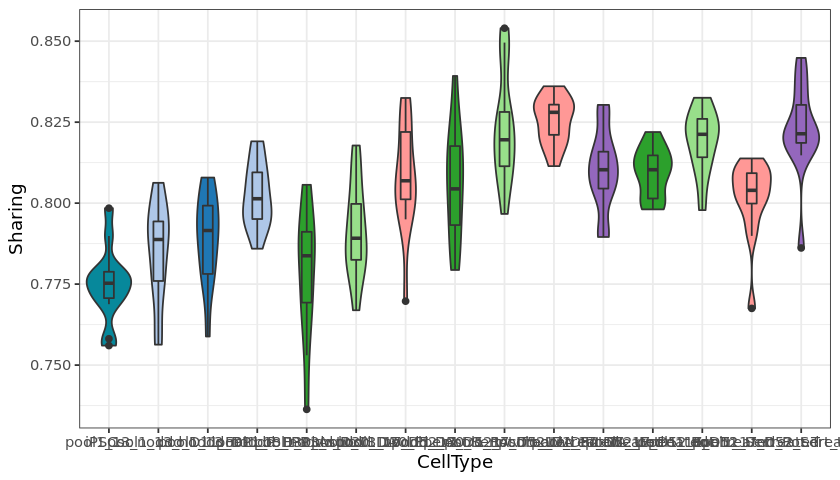

In [84]:
options(repr.plot.width=7, repr.plot.height=4)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_ips,
#                                                              col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none") 

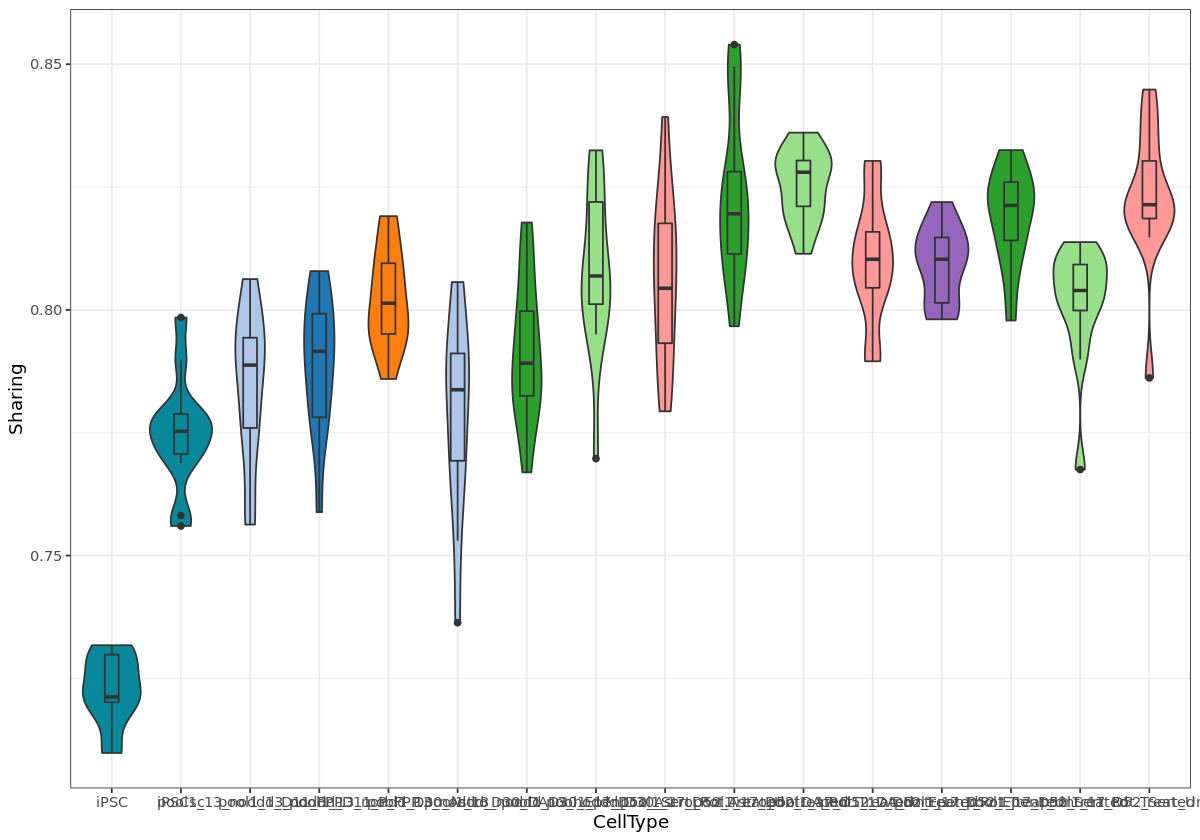

In [34]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,col_NB,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none") 

In [ ]:
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_ips,col_ips,
                            col_FPP,col_NB,col_P_FPP,
                            col_Astro,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_Astro,
                            col_DA,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Epen1,
                            col_Sert,col_Sert,col_Sert)) + theme(legend.position = "none")

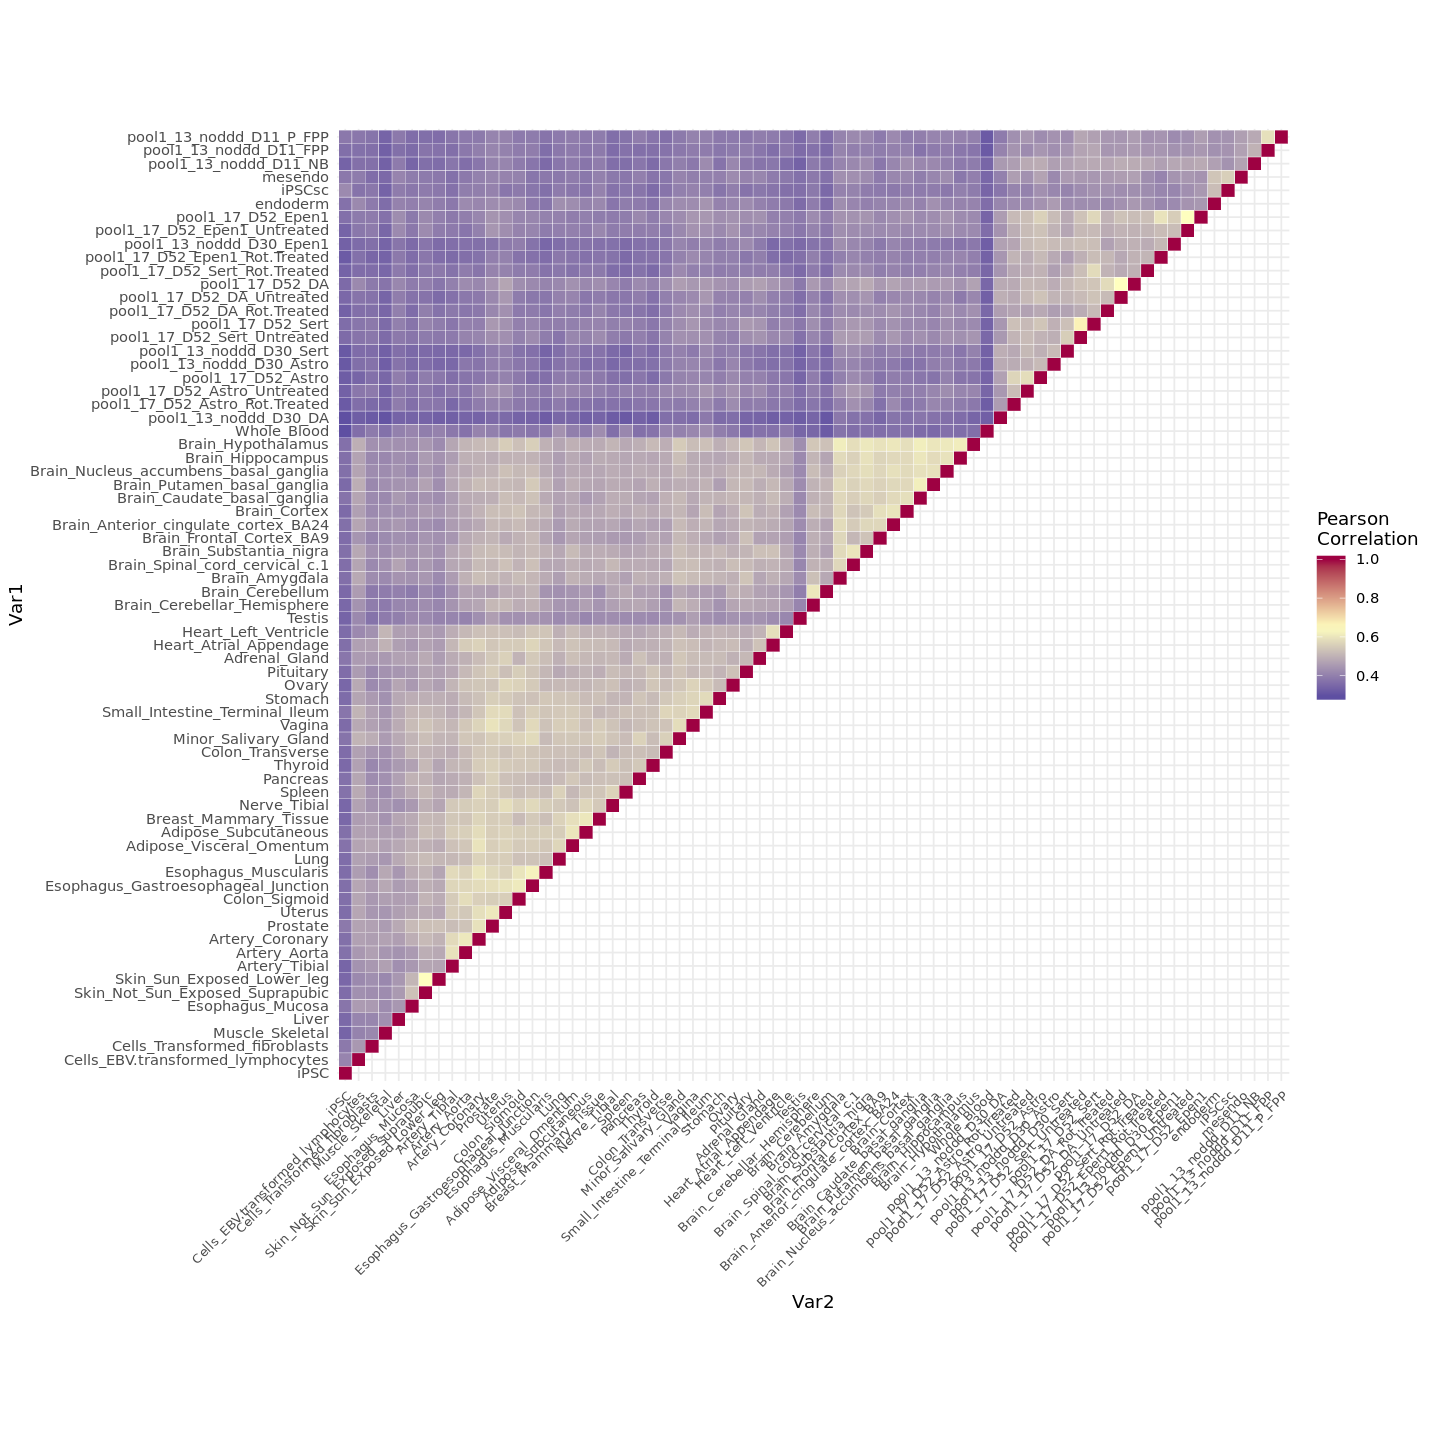

In [289]:
options(repr.plot.width=12, repr.plot.height=12)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "#5e4fa2", high = "#9e0142", mid = "#ffffbf", 
                       midpoint = (((1-min(pairwiseSharing))/2)+min(pairwiseSharing)), limit = c(min(pairwiseSharing),1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1))+
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1))+
  coord_fixed()
# Print the heatmap
print(ggheatmap)

Var1,Var2,value
<fct>,<fct>,<dbl>
Whole_Blood,Whole_Blood,1.0000000
Testis,Whole_Blood,0.7044922
Liver,Whole_Blood,0.7377049
Muscle_Skeletal,Whole_Blood,0.7157760
Heart_Atrial_Appendage,Whole_Blood,0.7287630
Heart_Left_Ventricle,Whole_Blood,0.7400468


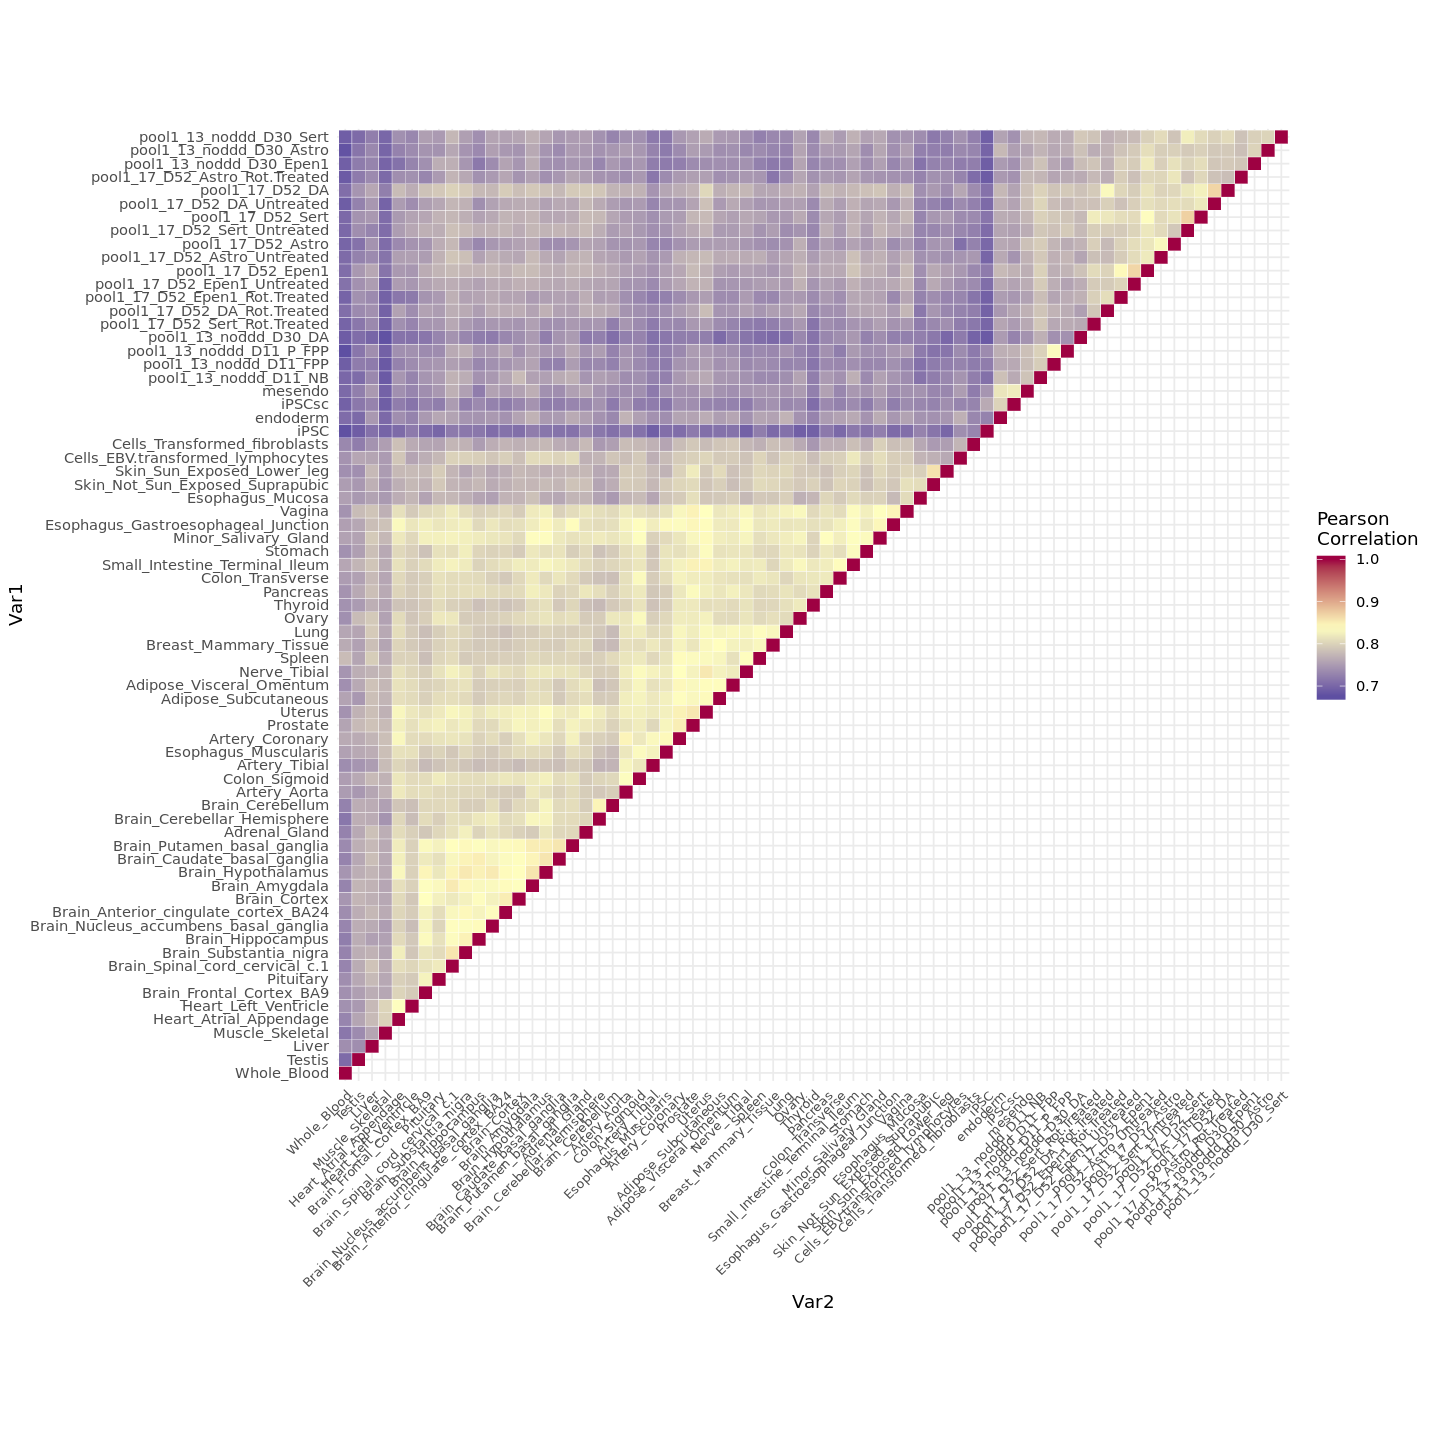

In [290]:
##Significant and sign
upper_tri <- get_lower_tri(reorder_cormat(as.matrix(pairwiseSharingSign)))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
head(melted_cormat)

# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "#5e4fa2", high = "#9e0142", mid = "#ffffbf", 
                       midpoint = (((1-min(pairwiseSharingSign))/2)+min(pairwiseSharingSign)), limit = c(min(pairwiseSharingSign),1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1))+
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1))+
  coord_fixed()
# Print the heatmap
print(ggheatmap)

Var1,Var2,value
<fct>,<fct>,<dbl>
Whole_Blood,Whole_Blood,0.7569702
Vagina,Whole_Blood,0.7569702
Uterus,Whole_Blood,0.7569702
Thyroid,Whole_Blood,0.7569702
Testis,Whole_Blood,0.7569702
Stomach,Whole_Blood,0.7569702


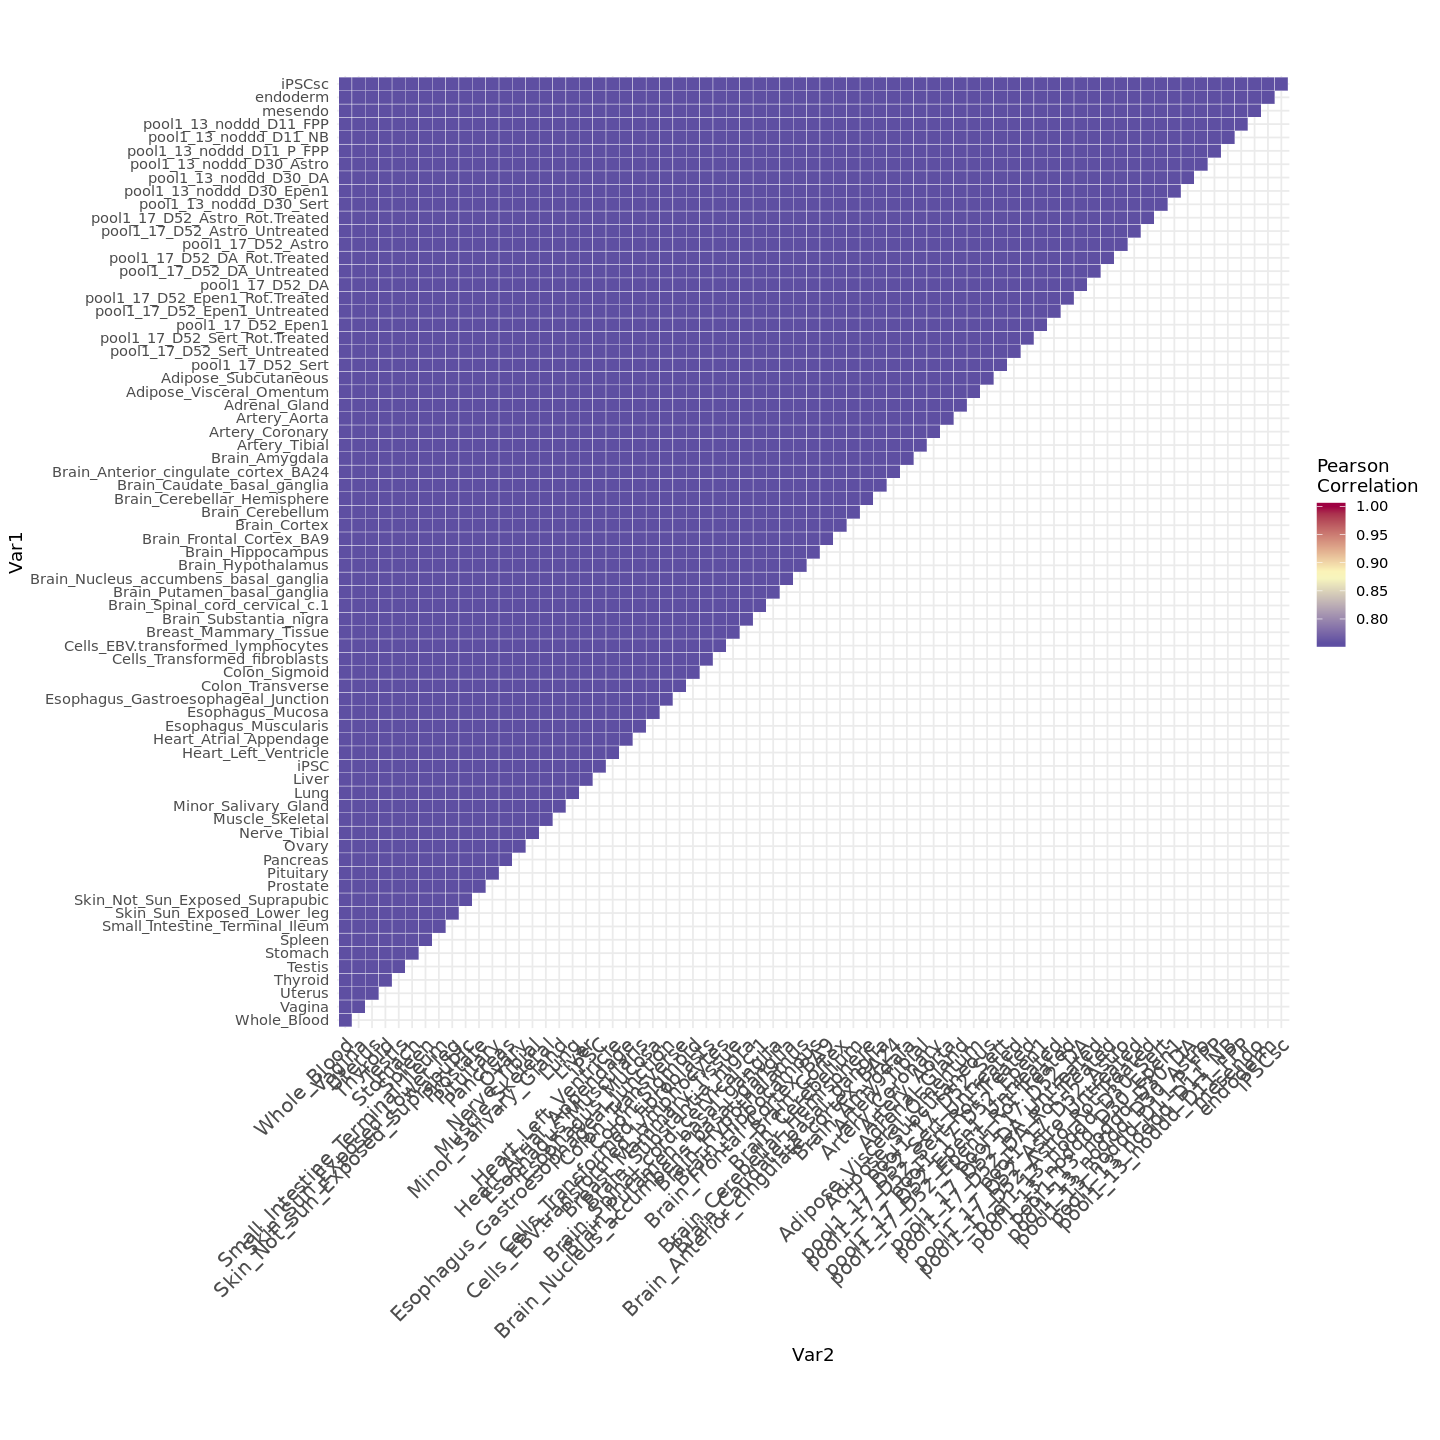

In [291]:
##BackGround
testingBackGround = total/nrow(lsfrMat)
colnames(testingBackGround) = colnames(lsfrMat)
rownames(testingBackGround) = colnames(lsfrMat)
upper_tri <- get_lower_tri(reorder_cormat(as.matrix(testingBackGround)))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
head(melted_cormat)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "#5e4fa2", high = "#9e0142", mid = "#ffffbf", 
                       midpoint = (((1-min(testingBackGround))/2)+min(testingBackGround)), limit = c(min(testingBackGround),1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1))+
  coord_fixed()
# Print the heatmap
print(ggheatmap)

In [ ]:
pairwiseSharingSign = sameSign/total
pairwiseSharing = sameSignMagnitude/total

colnames(pairwiseSharing) = colnames(lsfrMat)
rownames(pairwiseSharing) = colnames(lsfrMat)
colnames(pairwiseSharingSign) = colnames(lsfrMat)
rownames(pairwiseSharingSign) = colnames(lsfrMat)
head(pairwiseSharing)

In [ ]:
##BackGround
testingBackGround = total/nrow(lsfrMat)
colnames(testingBackGround) = colnames(lsfrMat)
rownames(testingBackGround) = colnames(lsfrMat)
head(testingBackGround)

In [33]:
new_mat = range01(pairwiseSharing - testingBackGround)
head(new_mat)

ERROR: Error in range01(pairwiseSharing - testingBackGround): could not find function "range01"


In [295]:
colnames(new_mat)[grep("_D",colnames(new_mat))]

[1] "pool1_13_noddd_D11_FPP"         "pool1_13_noddd_D11_NB"         
 [3] "pool1_13_noddd_D11_P_FPP"       "pool1_13_noddd_D30_Astro"      
 [5] "pool1_13_noddd_D30_DA"          "pool1_13_noddd_D30_Epen1"      
 [7] "pool1_13_noddd_D30_Sert"        "pool1_17_D52_Astro_Rot.Treated"
 [9] "pool1_17_D52_Astro_Untreated"   "pool1_17_D52_Astro"            
[11] "pool1_17_D52_DA_Rot.Treated"    "pool1_17_D52_DA_Untreated"     
[13] "pool1_17_D52_DA"                "pool1_17_D52_Epen1_Rot.Treated"
[15] "pool1_17_D52_Epen1_Untreated"   "pool1_17_D52_Epen1"            
[17] "pool1_17_D52_Sert_Rot.Treated"  "pool1_17_D52_Sert_Untreated"   
[19] "pool1_17_D52_Sert"

In [300]:
# cols1 <- c("iPSC", "iPSCsc", "mesendo", "endoderm",
           
#            "pool1_13_noddd_D11_FPP", "pool1_13_noddd_D11_P_FPP", "pool1_13_noddd_D11_NB",
           
#            "pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert","pool1_13_noddd_D30_Epen1","pool1_13_noddd_D30_Astro",
           
#            "pool1_17_D52_DA","pool1_17_D52_DA_Untreated","pool1_17_D52_DA_Rot.Treated",
           
#            "pool1_17_D52_Sert","pool1_17_D52_Sert_Untreated","pool1_17_D52_Sert_Rot.Treated",
           
#            "pool1_17_D52_Epen1","pool1_17_D52_Epen1_Untreated","pool1_17_D52_Epen1_Rot.Treated",
           
#            "pool1_17_D52_Astro","pool1_17_D52_Astro_Untreated","pool1_17_D52_Astro_Rot.Treated",

#             "Brain_Amygdala","Brain_Substantia_nigra",
#             "Brain_Anterior_cingulate_cortex_BA24","Brain_Caudate_basal_ganglia",
#             "Brain_Cerebellar_Hemisphere","Brain_Cerebellum","Brain_Cortex",
#             "Brain_Frontal_Cortex_BA9","Brain_Hippocampus","Brain_Hypothalamus",
#             "Brain_Nucleus_accumbens_basal_ganglia","Brain_Putamen_basal_ganglia",
#             "Brain_Spinal_cord_cervical_c.1","Pituitary",

#             "Skin_Not_Sun_Exposed_Suprapubic","Skin_Sun_Exposed_Lower_leg",

#             "Cells_EBV.transformed_lymphocytes","Cells_Transformed_fibroblasts",

#             "Whole_Blood",
#             "Adipose_Subcutaneous","Adipose_Visceral_Omentum",
#             "Artery_Aorta","Artery_Coronary","Artery_Tibial",
#             "Heart_Atrial_Appendage","Heart_Left_Ventricle",
#             "Breast_Mammary_Tissue","Esophagus_Muscularis",
#             "Muscle_Skeletal","Nerve_Tibial",

#             "Colon_Sigmoid","Colon_Transverse","Adrenal_Gland",
#             "Esophagus_Gastroesophageal_Junction","Esophagus_Mucosa",
#             "Liver","Lung","Minor_Salivary_Gland","Pancreas","Prostate",
#             "Small_Intestine_Terminal_Ileum","Spleen","Stomach","Thyroid",

#             "Ovary","Testis","Uterus","Vagina")
# cols1

In [301]:
# new_mat = new_mat[cols1,cols1]
# head(new_mat)

In [298]:
upper_tri <- get_lower_tri(reorder_cormat(as.matrix(new_mat)))
# upper_tri <- get_lower_tri(as.matrix(new_mat))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
head(melted_cormat)

Var1,Var2,value
<fct>,<fct>,<dbl>
iPSC,iPSC,1.00000000
Cells_EBV.transformed_lymphocytes,iPSC,0.16178690
Cells_Transformed_fibroblasts,iPSC,0.12979173
Muscle_Skeletal,iPSC,0.06580139
Liver,iPSC,0.07998793
Esophagus_Mucosa,iPSC,0.11651072


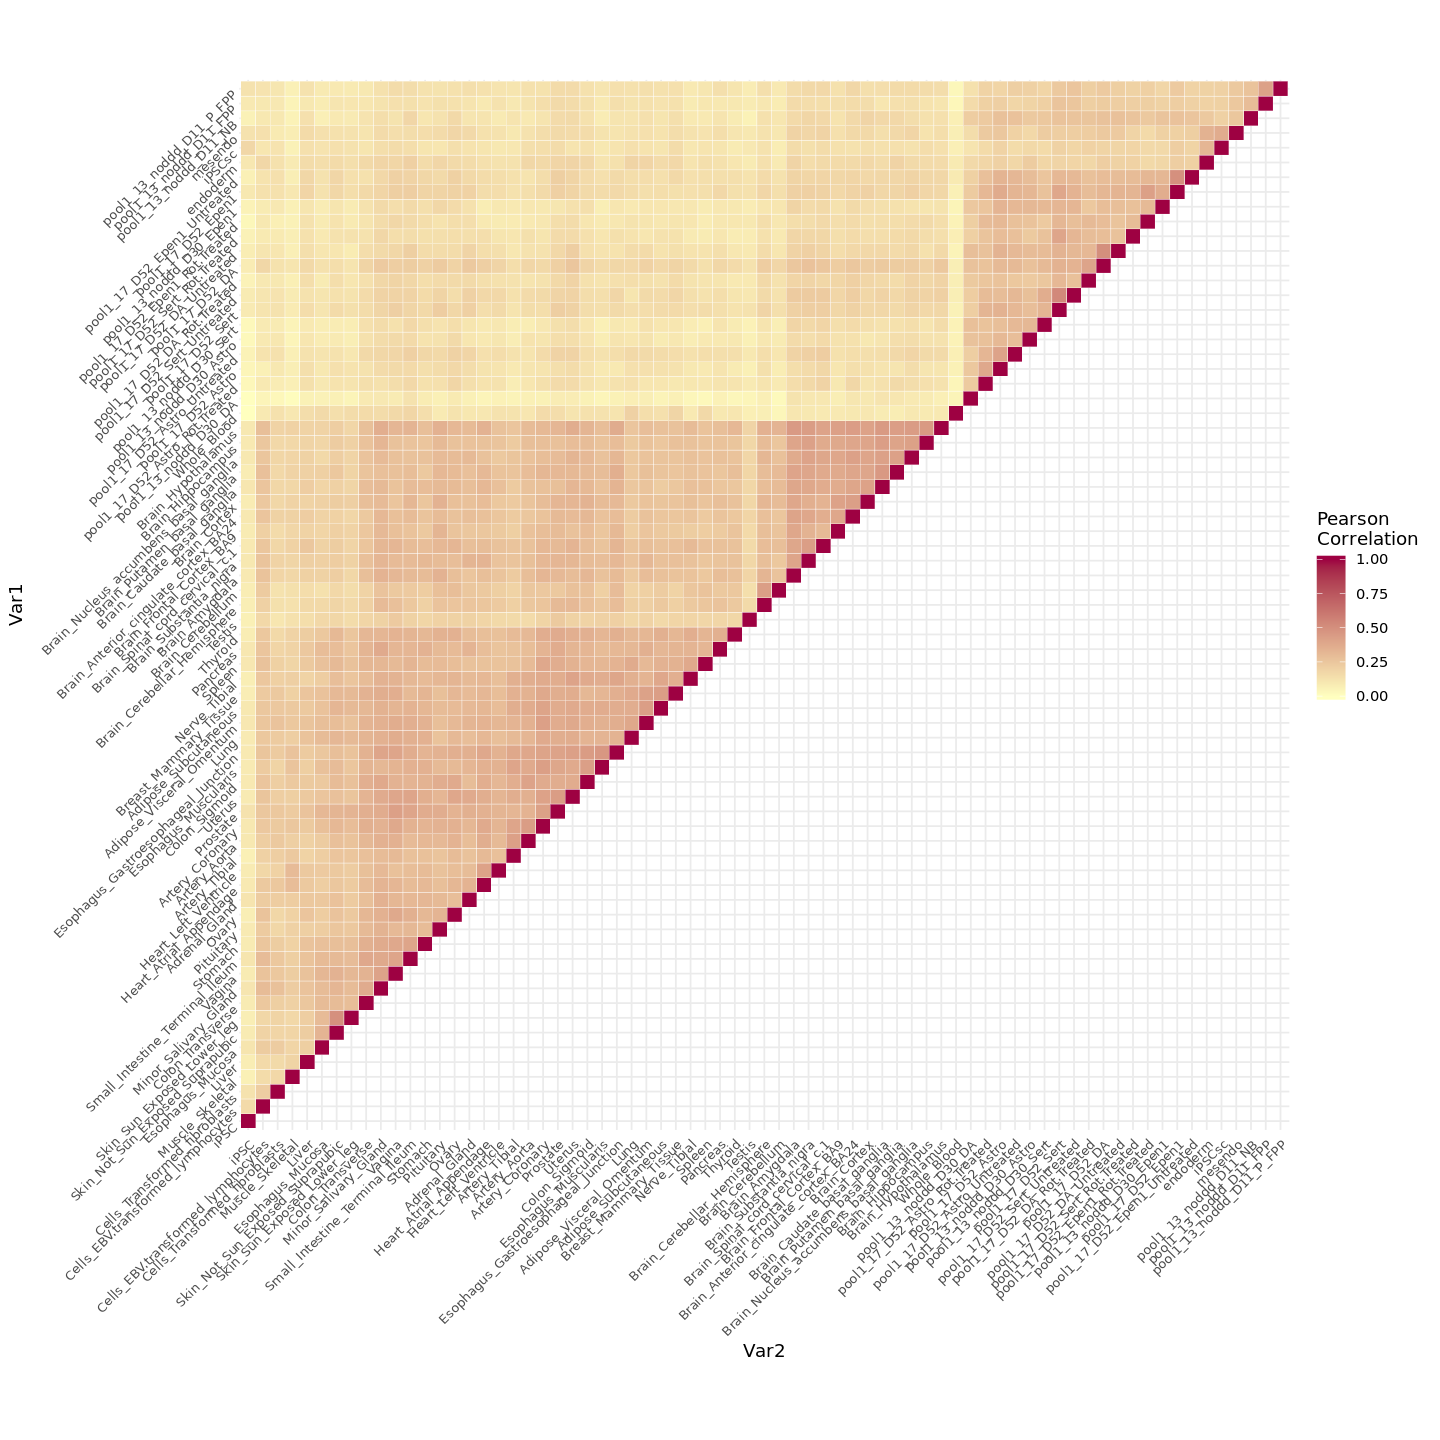

In [299]:
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "#5e4fa2", high = "#9e0142", mid = "#ffffbf", 
#                        midpoint = (((1-min(df$diff))/2)+min(df$diff)), 
#                        limit = c(min(df$diff),1), 
                       space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1))+
 theme(axis.text.y = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1))+
  coord_fixed()
# Print the heatmap
print(ggheatmap)

In [24]:
################

In [35]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [73]:
 nrow(pairwiseSharingSign)

[1] 71

In [88]:
# mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4,6:12,14:15,17:18,20:21)]
mat_to_plot1 = pairwiseSharingSign[c(29:41),c(4,6:12,14:15,17:18,20:21)]
mat_to_plot2 = pairwiseSharing[c(42:51,53:71),c(4,6:12,14:15,17:18,20:21)]
# rownames(mat_to_plot)
# colnames(mat_to_plot)

In [92]:
rownames(pairwiseSharing)[42:71]

[1] "Breast_Mammary_Tissue"               "Cells_EBV.transformed_lymphocytes"  
 [3] "Cells_Transformed_fibroblasts"       "Colon_Sigmoid"                      
 [5] "Colon_Transverse"                    "Esophagus_Gastroesophageal_Junction"
 [7] "Esophagus_Mucosa"                    "Esophagus_Muscularis"               
 [9] "Heart_Atrial_Appendage"              "Heart_Left_Ventricle"               
[11] "iPSC"                                "Liver"                              
[13] "Lung"                                "Minor_Salivary_Gland"               
[15] "Muscle_Skeletal"                     "Nerve_Tibial"                       
[17] "Ovary"                               "Pancreas"                           
[19] "Pituitary"                           "Prostate"                           
[21] "Skin_Not_Sun_Exposed_Suprapubic"     "Skin_Sun_Exposed_Lower_leg"         
[23] "Small_Intestine_Terminal_Ileum"      "Spleen"                             
[25] "Stomach"                             "Testis"                             
[27] "Thyroid"                             "Uterus"                             
[29] "Vagina"                              "Whole_Blood"

In [89]:
nrow(mat_to_plot2)

[1] 29

In [60]:
df1 = as.data.frame(mat_to_plot1) %>% gather(key="CellType", value="Sharing")
df1$Tissue = "Brain"
df2 = as.data.frame(mat_to_plot2) %>% gather(key="CellType", value="Sharing")
df2$Tissue = "Other"
df = rbind(df1,df2)
df$comparison = paste0(df$CellType,"-",df$Tissue)
head(df,2)

CellType,Sharing,Tissue,comparison
pool1_13_noddd_D11_FPP,0.8062752,Brain,pool1_13_noddd_D11_FPP-Brain
pool1_13_noddd_D11_FPP,0.7889702,Brain,pool1_13_noddd_D11_FPP-Brain


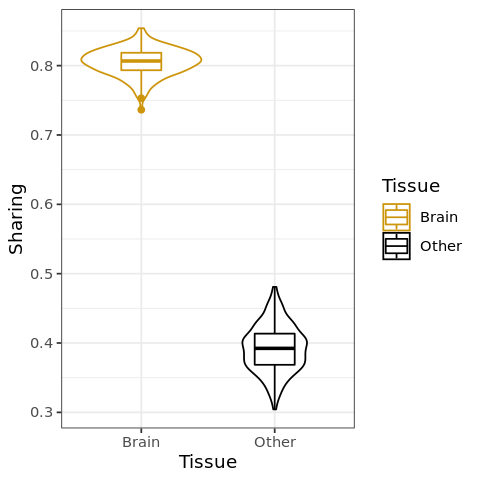

In [61]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df, aes(x = Tissue, y = Sharing, colour = Tissue)) + geom_violin() + geom_boxplot(width = 0.3) + 
    scale_colour_manual(values = c("darkgoldenrod3","black")) + theme_bw()

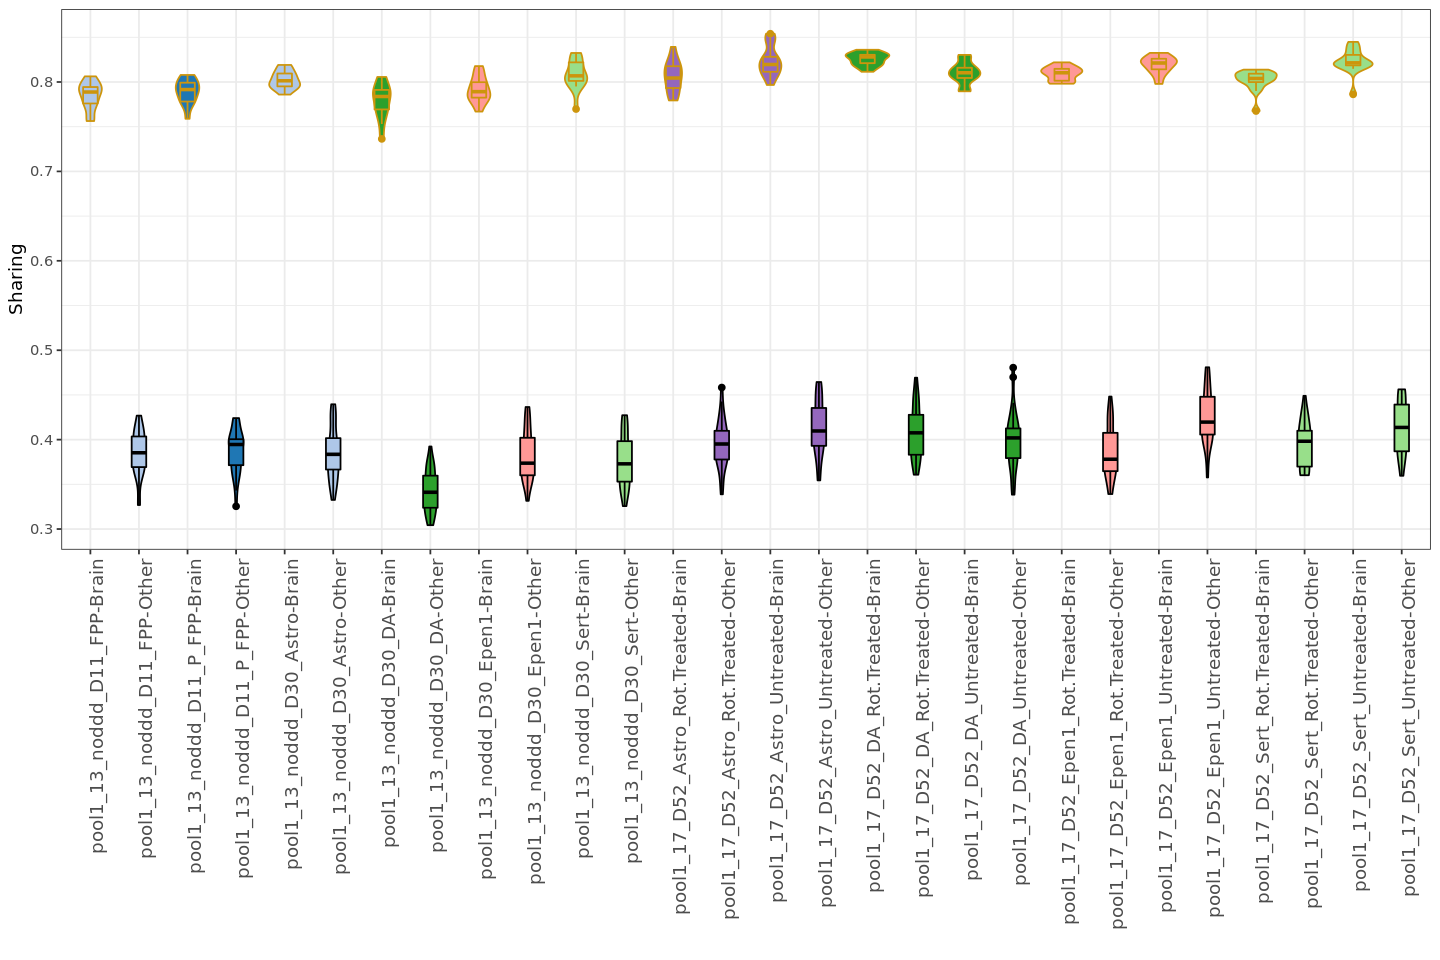

In [62]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=comparison, y=Sharing, fill=CellType, col = Tissue)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_colour_manual(values = c("darkgoldenrod3","black"))+
                scale_fill_manual(values = c(
#                     "gold","brown",
#                     col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") + 
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [89]:
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

CellType,Sharing
pool1_13_noddd_D11_FPP,0.8743873
pool1_13_noddd_D11_FPP,0.8830986


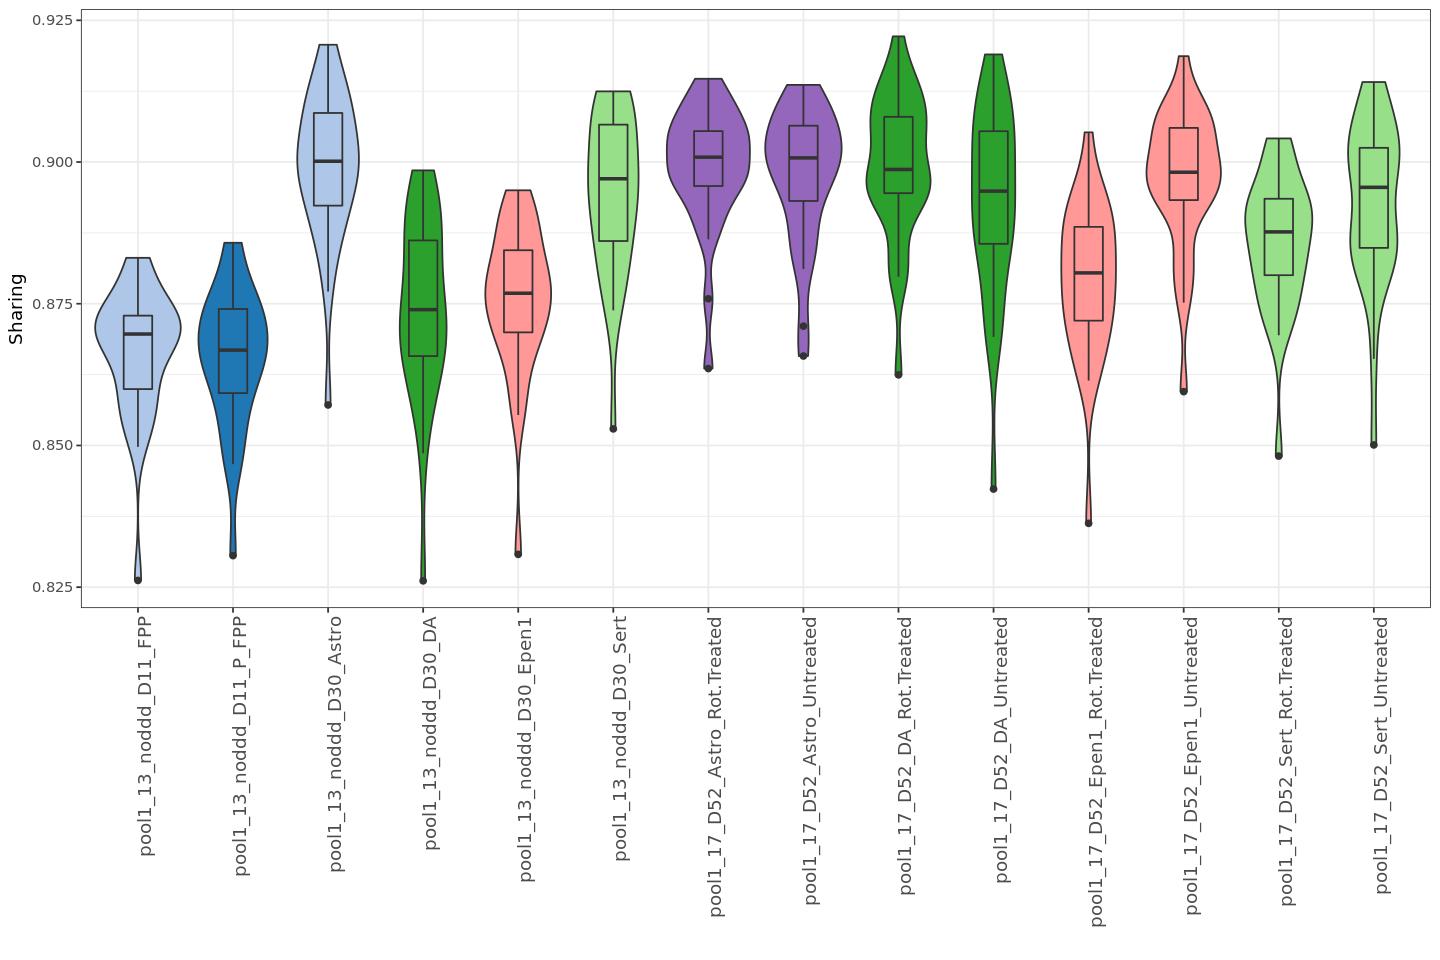

In [92]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
#                     "gold","brown",
#                     col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") + 
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

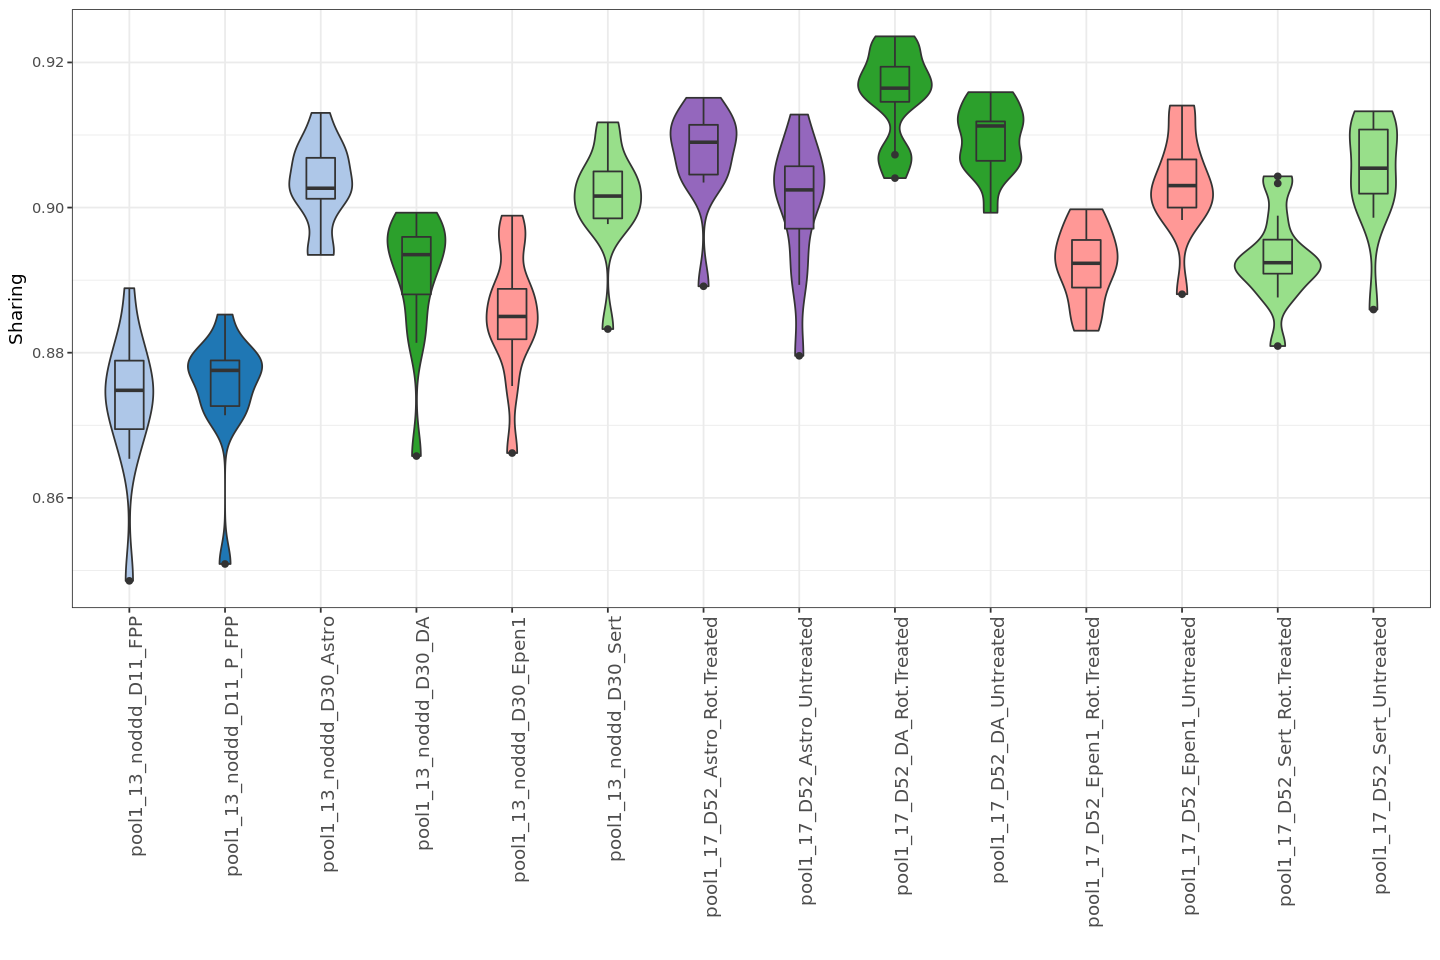

In [87]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
#                     "gold","brown",
#                     col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") +
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [120]:
mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4,6:12,14:15,17:18,20:21,41, 50)]
colnames(mat_to_plot)

[1] "iPSC"                           "iPSCsc"                        
 [3] "pool1_13_noddd_D11_FPP"         "pool1_13_noddd_D11_P_FPP"      
 [5] "pool1_13_noddd_D30_Astro"       "pool1_13_noddd_D30_DA"         
 [7] "pool1_13_noddd_D30_Epen1"       "pool1_13_noddd_D30_Sert"       
 [9] "pool1_17_D52_Astro_Rot.Treated" "pool1_17_D52_Astro_Untreated"  
[11] "pool1_17_D52_DA_Rot.Treated"    "pool1_17_D52_DA_Untreated"     
[13] "pool1_17_D52_Epen1_Rot.Treated" "pool1_17_D52_Epen1_Untreated"  
[15] "pool1_17_D52_Sert_Rot.Treated"  "pool1_17_D52_Sert_Untreated"   
[17] "Brain_Substantia_nigra"         "Heart_Atrial_Appendage"

In [121]:
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

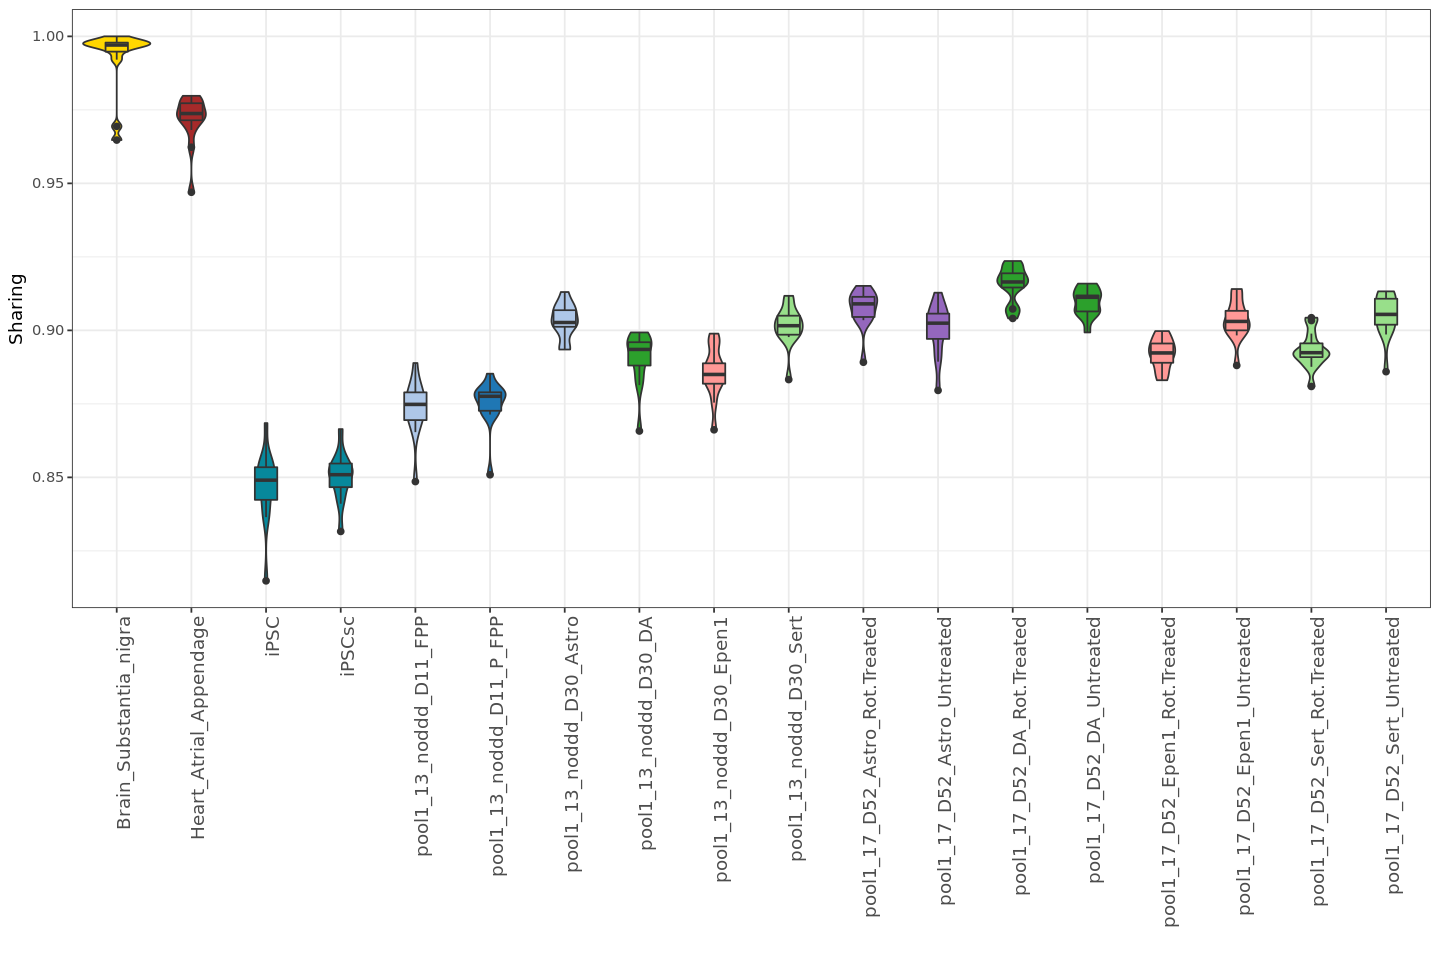

In [123]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
                    "gold","brown",
                    col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") +
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [42]:
df %>% mutate(CellType = factor(CellType, levels=c("iPSC","iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Rot.Treated",
                                    "pool1_17_D52_Sert_Rot.Treated","pool1_17_D52_Epen1_Rot.Treated",
                                                   "pool1_17_D52_Astro_Rot.Treated",
                                                  'Brain_Amygdala','Brain_Anterior_cingulate_cortex_BA24',
                                                   'Brain_Caudate_basal_ganglia','Brain_Cerebellar_Hemisphere',
                                                   'Brain_Cerebellum','Brain_Cortex','Brain_Frontal_Cortex_BA9',
                                                   'Brain_Hippocampus','Brain_Hypothalamus',
                                                   'Brain_Nucleus_accumbens_basal_ganglia',
                                                   'Brain_Putamen_basal_ganglia',
                                                   'Brain_Spinal_cord_cervical_c.1','Brain_Substantia_nigra')))

CellType,Sharing
iPSC,0.8684547
iPSC,0.8563015
iPSC,0.8382199
iPSC,0.8364641
iPSC,0.8147967
iPSC,0.8423619
iPSC,0.8506080
iPSC,0.8548662
iPSC,0.8486731
iPSC,0.8531588


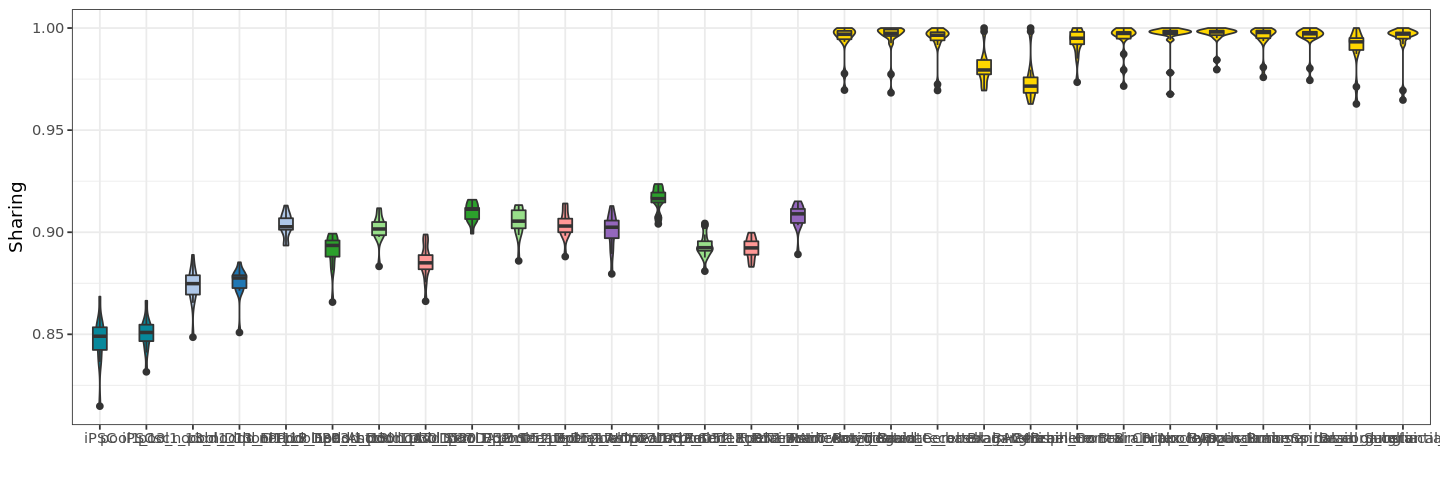

In [43]:
options(repr.plot.width=12, repr.plot.height=4)
ggplot(df,aes(x=factor(CellType, levels = c("iPSC","iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Rot.Treated",
                                    "pool1_17_D52_Sert_Rot.Treated","pool1_17_D52_Epen1_Rot.Treated",
                                                   "pool1_17_D52_Astro_Rot.Treated",
                                                  'Brain_Amygdala','Brain_Anterior_cingulate_cortex_BA24',
                                                   'Brain_Caudate_basal_ganglia','Brain_Cerebellar_Hemisphere',
                                                   'Brain_Cerebellum','Brain_Cortex','Brain_Frontal_Cortex_BA9',
                                                   'Brain_Hippocampus','Brain_Hypothalamus',
                                                   'Brain_Nucleus_accumbens_basal_ganglia',
                                                   'Brain_Putamen_basal_ganglia',
                                                   'Brain_Spinal_cord_cervical_c.1','Brain_Substantia_nigra')), 
              y=Sharing, fill=factor(CellType, levels = c("iPSC","iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Rot.Treated",
                                    "pool1_17_D52_Sert_Rot.Treated","pool1_17_D52_Epen1_Rot.Treated",
                                                   "pool1_17_D52_Astro_Rot.Treated",
                                                  'Brain_Amygdala','Brain_Anterior_cingulate_cortex_BA24',
                                                   'Brain_Caudate_basal_ganglia','Brain_Cerebellar_Hemisphere',
                                                   'Brain_Cerebellum','Brain_Cortex','Brain_Frontal_Cortex_BA9',
                                                   'Brain_Hippocampus','Brain_Hypothalamus',
                                                   'Brain_Nucleus_accumbens_basal_ganglia',
                                                   'Brain_Putamen_basal_ganglia',
                                                   'Brain_Spinal_cord_cervical_c.1','Brain_Substantia_nigra')))) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            "gold","gold","gold","gold","gold","gold","gold",
                            "gold","gold","gold","gold","gold","gold"))+ 
theme_bw() + xlab("") +
theme(legend.position = "none") 

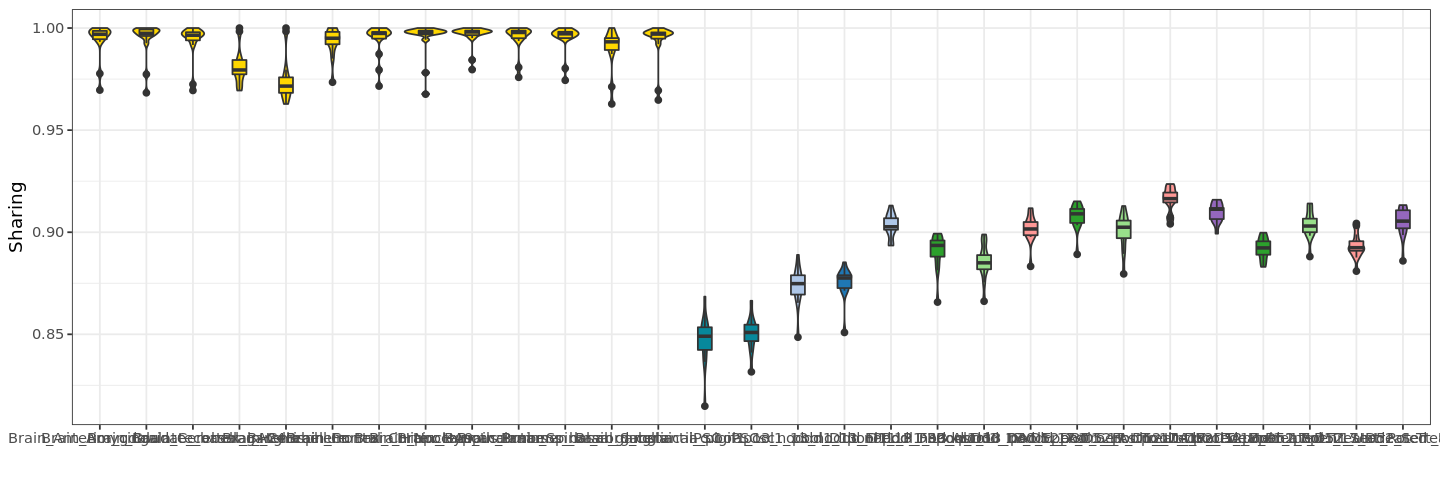

In [46]:
options(repr.plot.width=12, repr.plot.height=4)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
                    "gold",
                    col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro
                            ))+ 
theme_bw() + xlab("") +
theme(legend.position = "none") 